## Aula 3 - Modelagem de Componentes de Irradiância no Plano Horizontal e no Plano do Módulo

- Nessa aula vimos:

1) Localização da Usina, Determinação do Intervalo de Tempo para a Modelagem, Posição Solar e Ângulo de Incidência Solar (AOI) no Módulo FV.

2) Modelagem de Clearsky e Importação de Dados Solarimétricos Reais através da função no pvlib **pvlib.iotools.read_midc_raw_data_from_nrel**. 
- Apresentação da Função Kt, Diffuse Fraction e Validação da Equação GHI = Cos(Teta_z)*DNI e DHI (Essa parte foi acrescentada pós a aula)

2) Modelagem de Decomposição (GHI -> DNI e DHI)
- Erbs
- Disc
- Boland
- Dirint

3) Modelagem de Transposição (GHI -> POA)

OBS1: Todas as etapas têm exercícios para casa, os quais são recomendados para auxiliar no processo de aprendizagem e no projeto de Modelagem FV.

OBS2: É fortemente recomendado que quando estudarem os códigos, vão comentando os códigos para fixarem o entendimento do que o código faz.

OBS3: Aqui vão algumas referências para fortalecerem o conhecimento dessa aula:

- https://pvlib-python.readthedocs.io/en/stable/user_guide/clearsky.html - Guia do Usuário no pvlib sobre ClearSky

- https://pvlib-python.readthedocs.io/en/stable/user_guide/weather_data.html - Guia do Usuário no pvlib sobre Weather Data

- https://pvlib-python.readthedocs.io/en/stable/gallery/index.html - Galeria de Exemplos feitos no pvlib

- https://cresesb.cepel.br/index.php?section=publicacoes&task=livro&cid=481 - Manual de Engenharia para Sistemas Fotovoltaicos (2014), do CRESESB. Há uma seção sobre geometria solar que pode dar uma boa ajuda no entendimento do que foi visto na aula. É gratuito!

In [1]:
import pvlib
import pandas as pd 
from pvlib import location
import matplotlib.pyplot as plt

latitude = 43.0731
longitude = -89.4012
tz = 'Etc/GMT+6'

date = pd.Timestamp('2020-02-13 10:30:00', tz=tz) # Função pandas horário

#Ângulo da superfície
tilt= 45
surface_azimuth = 180 + 15

solar_position = pvlib.solarposition.get_solarposition(time=date, latitude=latitude, longitude=longitude)
#solar_position.keys()
aoi = pvlib.irradiance.aoi(surface_tilt = tilt, 
                           surface_azimuth=surface_azimuth, 
                           solar_zenith = solar_position['zenith'], 
                           solar_azimuth= solar_position['azimuth'])

aoi_deg = aoi.iloc[0] #Aqui faz aparecer apenas o valor do AOI, em degraus (°)
print(aoi) #Aqui aparece o valor do AOI e o índice em tempo
print(aoi_deg)  

2020-02-13 10:30:00-06:00    37.748686
Name: aoi, dtype: float64
37.74868649472142


<Axes: >

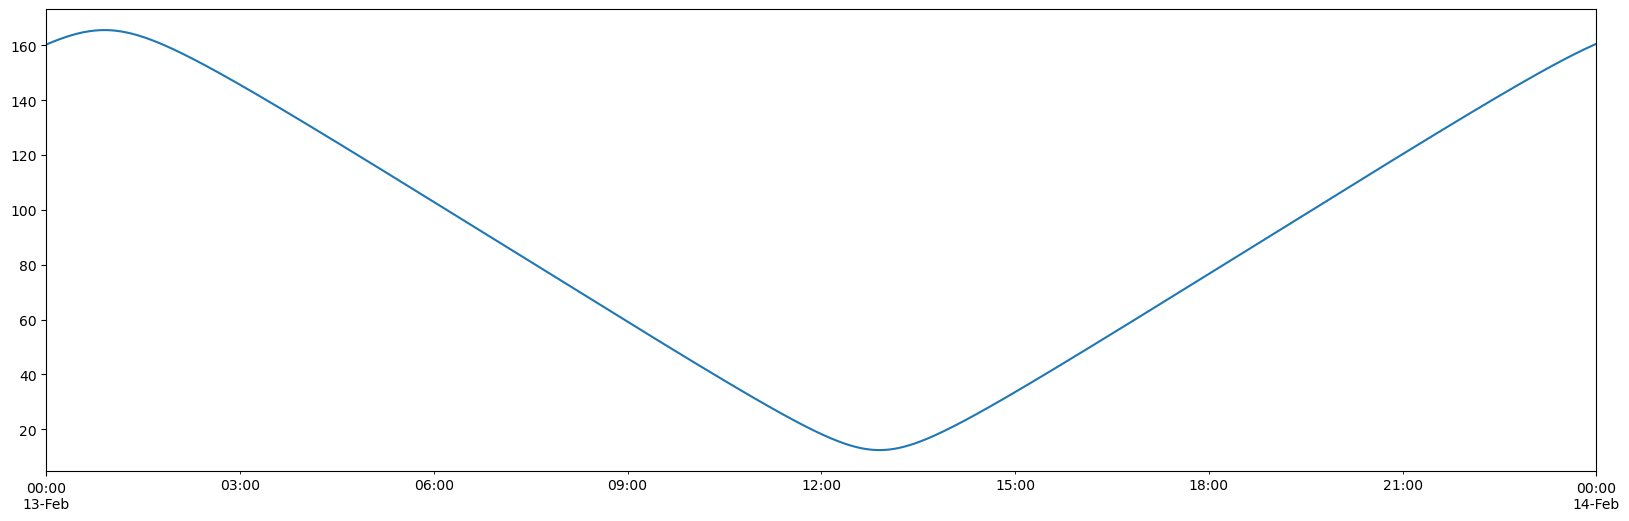

In [2]:
#Vamos variar o AOI ao longo do dia
start = '2020-02-13'
end = '2020-02-14'
site = location.Location(latitude, longitude, tz=tz)
times = pd.date_range(start, end, freq='1min', tz=site.tz)

# Ângulos da superfície
tilt = 45  # inclinação da superfície
surface_azimuth = 180 + 15  # 15 graus oeste do sul (Sul é 180 graus)

# Calcula a posição solar
solar_position = pvlib.solarposition.get_solarposition(time=times, latitude=latitude, longitude=longitude)

# Calcula o ângulo de incidência
aoi = pvlib.irradiance.aoi(surface_tilt=tilt,
                           surface_azimuth=surface_azimuth,
                           solar_zenith=solar_position['zenith'],
                           solar_azimuth=solar_position['azimuth'])

aoi.plot(figsize=(20,6))

In [3]:
solar_position.keys()

Index(['apparent_zenith', 'zenith', 'apparent_elevation', 'elevation',
       'azimuth', 'equation_of_time'],
      dtype='object')

#### Exercício 1 para Casa

1) Explorem e observem a variação, ao longo do tempo, das variáveis que estão na função pvlib.solarposition.get_solarposition(times, latitude, longitude);

- Para 1 dia;

- Para 1 mês;

- Para 1 ano;

OBS: Para plotar o gráfico, apenas chame a coluna do dataset que está na variável. Por exemplo: **solar_position['equation_of_time'].plot(figsize=(20,6))**. Só repetir isso para as outras variáveis.

### Modelo de Perez-Ineichen a Céu Limpo

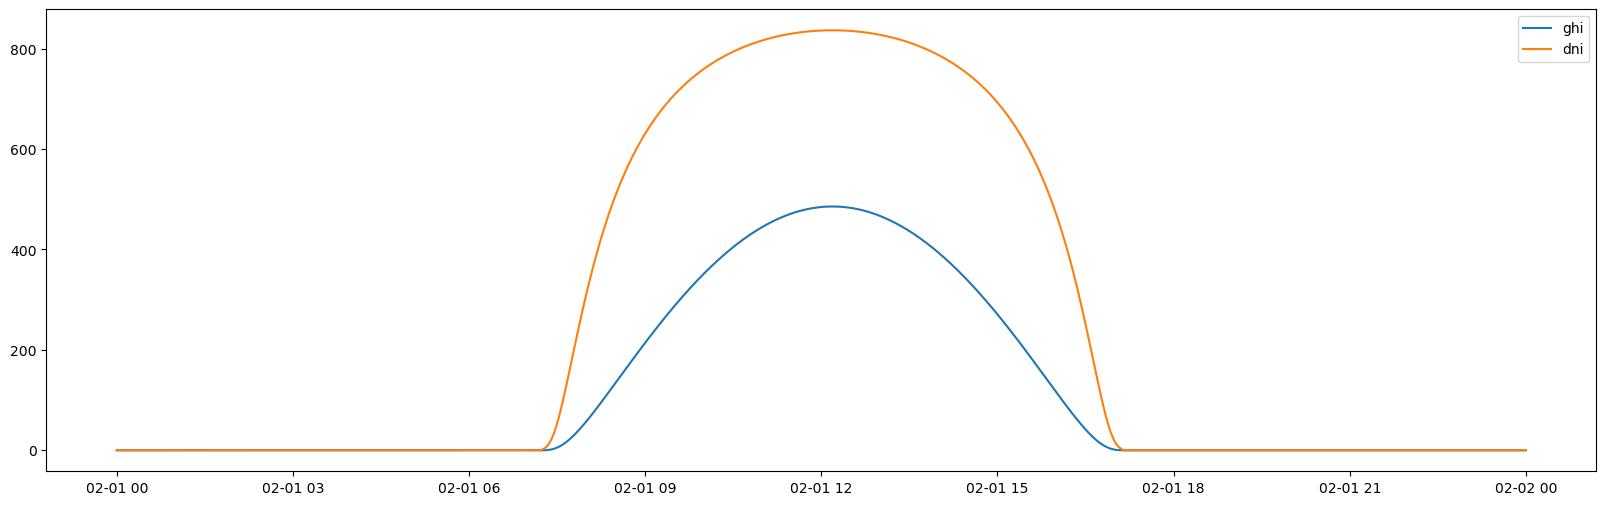

In [4]:
start = '2020-02-01'
end = '2020-02-02'
site = location.Location(latitude, longitude, tz=tz)
times = pd.date_range(start, end, freq='1min', tz=site.tz)

ineichen = site.get_clearsky(times, model = 'ineichen')

plt.figure(figsize=(20,6))
#ineichen.keys()
plt.plot(times, ineichen['ghi'], label = 'ghi')
#plt.plot(times, ineichen['dhi'], label = 'dhi')
plt.plot(times, ineichen['dni'], label = 'dni')

plt.legend()

1407.955135262276


<Axes: >

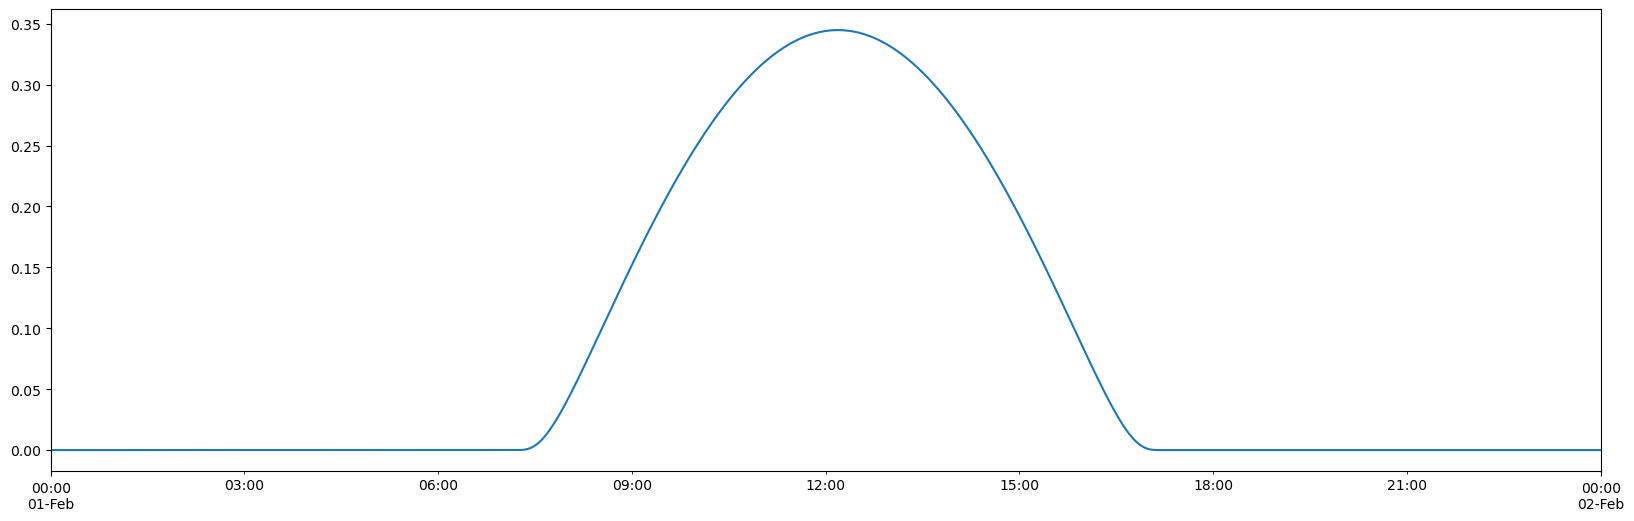

In [5]:
dni_extra = pvlib.irradiance.get_extra_radiation(times)

Kt = ineichen['ghi']/dni_extra
print(dni_extra.max())

Kt.plot(figsize=(20,6))

Usando dados medidos (reais) de uma estação solarimétrica localizada na Universidade de Oregon

In [6]:
#Import Data
#Localização da Universidade de Oregon

df_weather = pvlib.iotools.read_midc_raw_data_from_nrel('UOSMRL',               # Station id
                                                    pd.Timestamp('20230601'),   # Start date YYYYMMDD
                                                    pd.Timestamp('20230607'))   # End date  YYYYMMDD

df_weather.head(3)

Unnamed: 0  Year  DOY  PST  SR20 Temp [deg C]  \
2023-06-01 00:00:00-08:00           0  2023  152    0              10.63   
2023-06-01 00:01:00-08:00           0  2023  152    1              10.63   
2023-06-01 00:02:00-08:00           0  2023  152    2              10.63   

                           Direct NIP [W/m^2]  Diffuse [W/m^2]  \
2023-06-01 00:00:00-08:00               13.04           -1.298   
2023-06-01 00:01:00-08:00               13.05           -1.368   
2023-06-01 00:02:00-08:00               13.05           -1.394   

                           Global LI-200 [W/m^2]  Relative Humidity [%]  \
2023-06-01 00:00:00-08:00                  0.029                  70.71   
2023-06-01 00:01:00-08:00                  0.029                  70.84   
2023-06-01 00:02:00-08:00                  0.032                  70.75   

                           Air Temperature [deg C]  ...  CHP1 Temp [deg K]  \
2023-06-01 00:00:00-08:00                    10.86  ...              283.2   
2023-06-01 00:01:00-08:00                    10.82  ...              283.2   
2023-06-01 00:02:00-08:00                    10.82  ...              283.2   

                           CMP22 Temp [deg K]  \
2023-06-01 00:00:00-08:00               284.6   
2023-06-01 00:01:00-08:00               284.6   
2023-06-01 00:02:00-08:00               284.6   

                           Avg Wind Direction @ 10m [deg from N]  \
2023-06-01 00:00:00-08:00                                  306.1   
2023-06-01 00:01:00-08:00                                  307.9   
2023-06-01 00:02:00-08:00                                  323.3   

                           Zenith Angle [degrees]  Azimuth Angle [degrees]  \
2023-06-01 00:00:00-08:00               113.87990                357.44185   
2023-06-01 00:01:00-08:00               113.88743                357.69513   
2023-06-01 00:02:00-08:00               113.89417                357.94844   

                           Airmass  Solar Eclipse Shading  \
2023-06-01 00:00:00-08:00     -1.0                      0   
2023-06-01 00:01:00-08:00     -1.0                      0   
2023-06-01 00:02:00-08:00     -1.0                      0   

                           Direct SAMPA/Bird (calc) [W/m^2]  \
2023-06-01 00:00:00-08:00                               0.0   
2023-06-01 00:01:00-08:00                               0.0   
2023-06-01 00:02:00-08:00                               0.0   

                           Global SAMPA/Bird (calc) [W/m^2]  \
2023-06-01 00:00:00-08:00                               0.0   
2023-06-01 00:01:00-08:00                               0.0   
2023-06-01 00:02:00-08:00                               0.0   

                           Diffuse SAMPA/Bird (calc) [W/m^2]  
2023-06-01 00:00:00-08:00                                0.0  
2023-06-01 00:01:00-08:00                                0.0  
2023-06-01 00:02:00-08:00                                0.0  

[3 rows x 29 columns]

In [7]:
df_weather.keys()

Index(['Unnamed: 0', 'Year', 'DOY', 'PST', 'SR20 Temp [deg C]',
       'Direct NIP [W/m^2]', 'Diffuse [W/m^2]', 'Global LI-200 [W/m^2]',
       'Relative Humidity [%]', 'Air Temperature [deg C]',
       'Avg Wind Speed @ 10m [m/s]', 'Station Pressure [mBar]',
       'Downwelling IR PIR [W/m^2]', 'Instrument Net PIR [W/m^2]',
       'PIR Case Temp [deg K]', 'PIR Dome Temp [deg K]',
       'Logger Battery [VDC]', 'Direct CHP1 [W/m^2]', 'Global CMP22 [W/m^2]',
       'CHP1 Temp [deg K]', 'CMP22 Temp [deg K]',
       'Avg Wind Direction @ 10m [deg from N]', 'Zenith Angle [degrees]',
       'Azimuth Angle [degrees]', 'Airmass', 'Solar Eclipse Shading',
       'Direct SAMPA/Bird (calc) [W/m^2]', 'Global SAMPA/Bird (calc) [W/m^2]',
       'Diffuse SAMPA/Bird (calc) [W/m^2]'],
      dtype='object')

In [8]:
df_weather = df_weather[['Global CMP22 [W/m^2]', 'Diffuse [W/m^2]',
                         'Direct CHP1 [W/m^2]','Air Temperature [deg C]', 'Avg Wind Speed @ 10m [m/s]', 'Station Pressure [mBar]', 
                         'Zenith Angle [degrees]']]
# Rename the columns
df_weather.columns = ['ghi', 'dhi', 'dni', 'temp_air', 'wind_speed', 'air_pressure', 'teta_z']

In [9]:
df_weather

ghi    dhi    dni  temp_air  wind_speed  \
2023-06-01 00:00:00-08:00 -0.412 -1.298  0.425     10.86       1.550   
2023-06-01 00:01:00-08:00 -0.412 -1.368  0.425     10.82       2.775   
2023-06-01 00:02:00-08:00 -0.400 -1.394  0.425     10.82       2.550   
2023-06-01 00:03:00-08:00 -0.389 -1.374  0.425     10.86       2.288   
2023-06-01 00:04:00-08:00 -0.374 -1.387  0.425     10.89       2.575   
...                          ...    ...    ...       ...         ...   
2023-06-07 23:55:00-08:00 -0.023 -0.952  0.425     12.81       0.938   
2023-06-07 23:56:00-08:00 -0.029 -1.015  0.425     12.96       0.337   
2023-06-07 23:57:00-08:00 -0.028 -0.965  0.425     12.94       1.100   
2023-06-07 23:58:00-08:00 -0.045 -1.134  0.425     13.00       1.075   
2023-06-07 23:59:00-08:00 -0.057 -1.162  0.425     13.04       1.188   

                           air_pressure     teta_z  
2023-06-01 00:00:00-08:00       999.080  113.87990  
2023-06-01 00:01:00-08:00       999.095  113.88743  
2023-06-01 00:02:00-08:00       999.073  113.89417  
2023-06-01 00:03:00-08:00       999.097  113.90011  
2023-06-01 00:04:00-08:00       999.098  113.90525  
...                                 ...        ...  
2023-06-07 23:55:00-08:00       997.421  113.01981  
2023-06-07 23:56:00-08:00       997.429  113.03214  
2023-06-07 23:57:00-08:00       997.427  113.04368  
2023-06-07 23:58:00-08:00       997.426  113.05444  
2023-06-07 23:59:00-08:00       997.438  113.06442  

[10080 rows x 7 columns]

<Axes: >

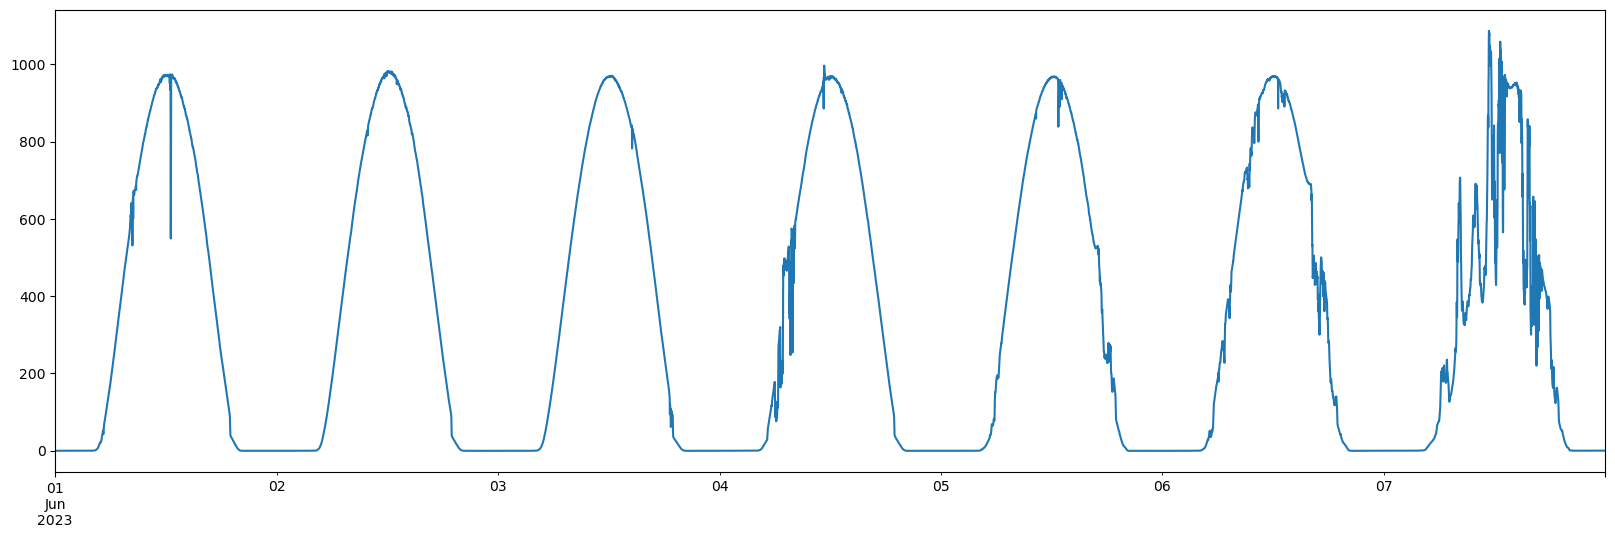

In [10]:
df_weather['ghi'].plot(figsize=(20,6))

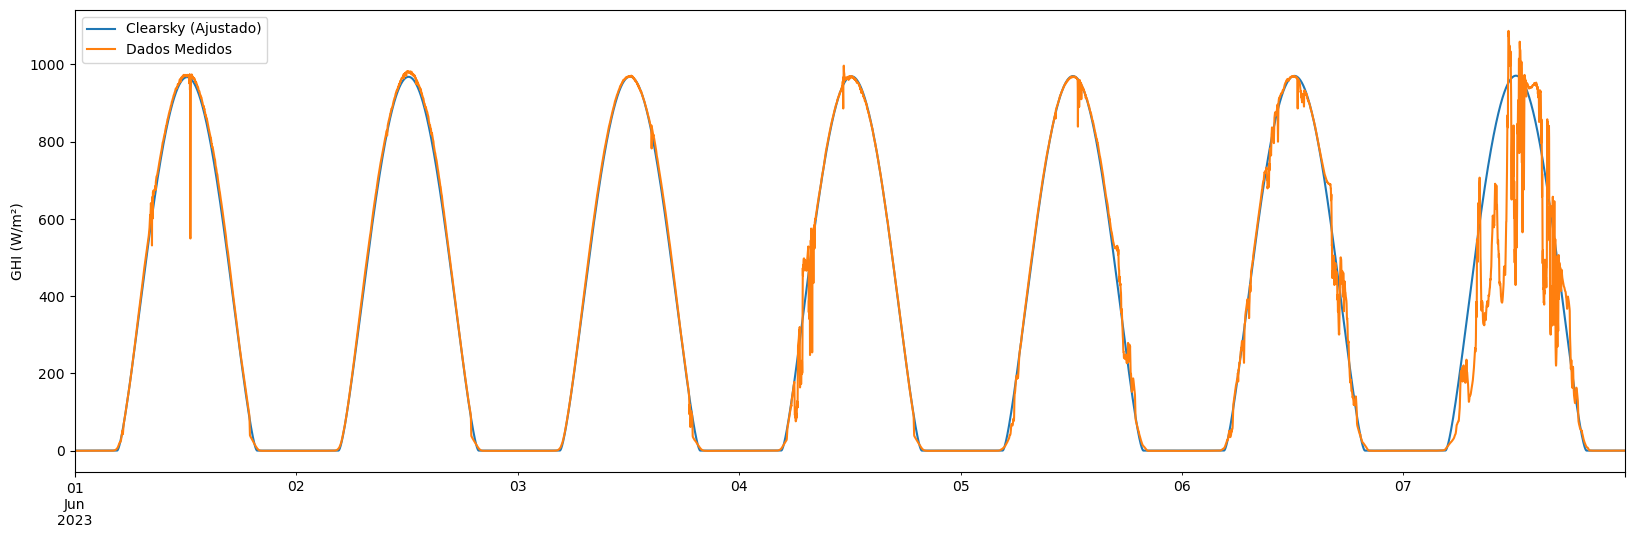

In [11]:
import pandas as pd
import pvlib

# Defina a localização corretamente com o fuso horário
# Essa função ajusta o fuso horário do clearsky com os dados medidos. Isso vai servir bastante para trabalhos futuros que vão comparar os daods 
# medidos com os simulados.
loc = pvlib.location.Location(
    latitude=44.0467,
    longitude=-123.0743,
    altitude=133.8,
    tz='UTC'  # ou 'America/Los_Angeles' (dependendo dos seus dados)
)

# Gera o clearsky no mesmo timezone dos dados medidos
ineichen = loc.get_clearsky(df_weather.index, model='simplified_solis')

# Plota os dados
plt.figure(figsize=(20, 6))
ineichen['ghi'].plot(label='Clearsky (Ajustado)')
df_weather['ghi'].plot(label='Dados Medidos')
plt.legend()
plt.ylabel('GHI (W/m²)')
plt.show()

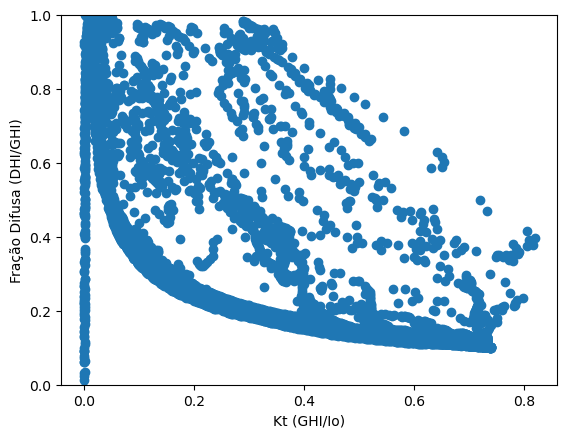

In [12]:
# Kt x Diffuse Fraction
dni_extra = pvlib.irradiance.get_extra_radiation(df_weather.index)
Kt = df_weather['ghi']/dni_extra 
diff_fraction = df_weather['dhi']/df_weather['ghi']

plt.scatter(Kt, diff_fraction)
plt.ylim(0, 1)
plt.xlabel('Kt (GHI/Io)')
plt.ylabel('Fração Difusa (DHI/GHI)')
plt.show()

<Axes: >

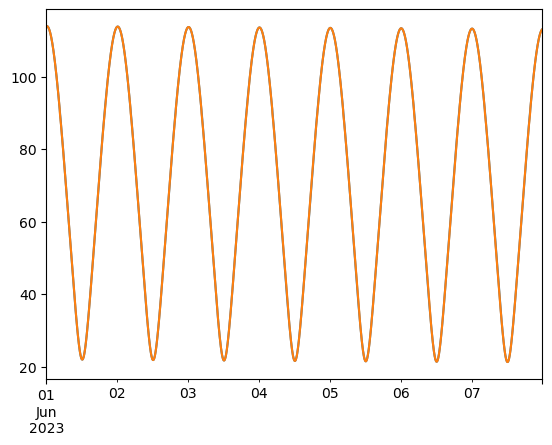

In [13]:
#Aqui eu mostro que o zenite modelado é praticamente o medo do zenite medido, que está presente na base de dados do NREL. 
solpos = loc.get_solarposition(df_weather.index)
solpos['zenith'].plot() #modelado
df_weather['teta_z'].plot() #medido

- Validando a Equação GHI = Cos(Teta_z)*DNI + DHI

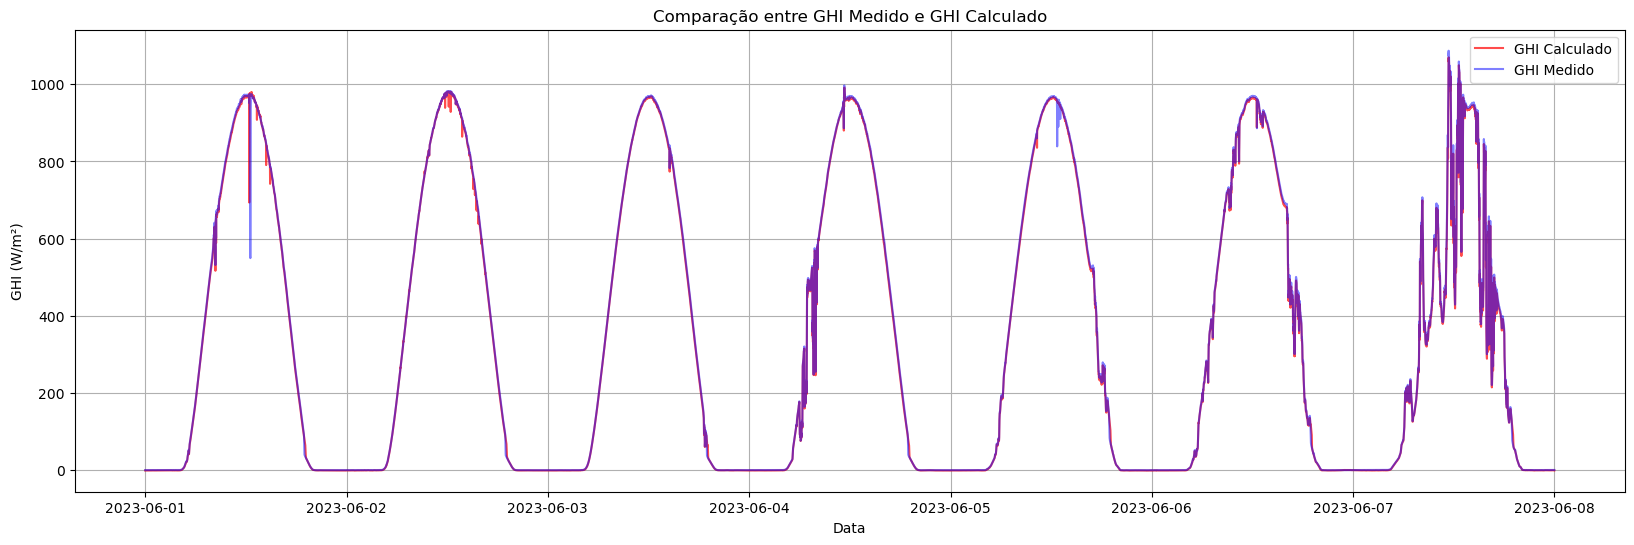


--- Métricas de Avaliação ---
RMSE: 8.79 W/m²
MAE: 3.52 W/m²
R²: 0.9994
Bias (Calculado - Medido): -2.69 W/m²


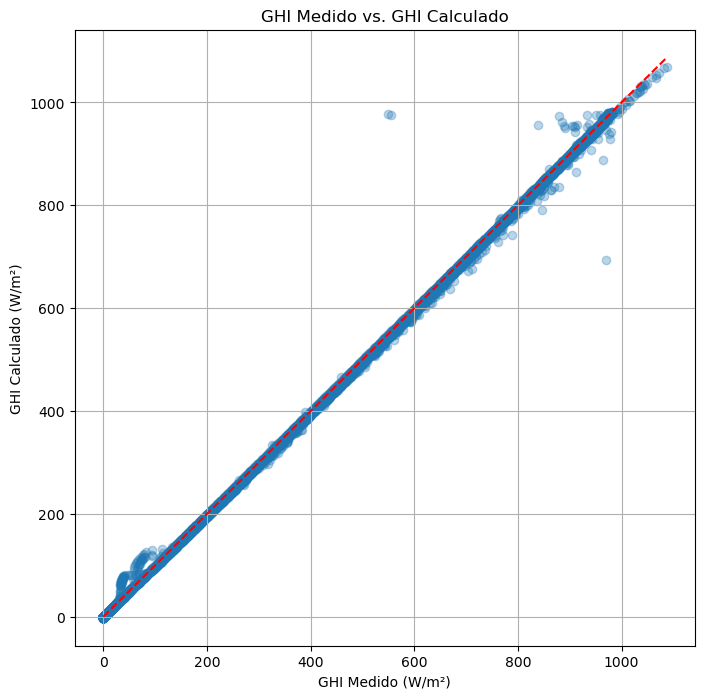

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pvlib.solarposition import get_solarposition
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Calcular o GHI a partir de DNI, DHI e ângulo zenital (theta_z)
# Convertendo theta_z de graus para radianos (caso ainda não esteja)
solpos = loc.get_solarposition(df_weather.index) 
theta_z_rad = np.radians(solpos['zenith'])
ghi_calculado = np.cos(theta_z_rad) * df_weather['dni'] + df_weather['dhi']

# 2. Plotar comparação
plt.figure(figsize=(20, 6))
plt.plot(df_weather.index, ghi_calculado, label='GHI Calculado', color='red', alpha=0.7)
plt.plot(df_weather.index, df_weather['ghi'], label='GHI Medido', color='blue', alpha=0.5)
plt.xlabel('Data')
plt.ylabel('GHI (W/m²)')
plt.title('Comparação entre GHI Medido e GHI Calculado')
plt.legend()
plt.grid(True)
plt.show()

# 3. Métricas de avaliação
rmse = np.sqrt(mean_squared_error(df_weather['ghi'], ghi_calculado))
mae = mean_absolute_error(df_weather['ghi'], ghi_calculado)
r2 = r2_score(df_weather['ghi'], ghi_calculado)
bias = np.mean(ghi_calculado - df_weather['ghi'])

print("\n--- Métricas de Avaliação ---")
print(f"RMSE: {rmse:.2f} W/m²")
print(f"MAE: {mae:.2f} W/m²")
print(f"R²: {r2:.4f}")
print(f"Bias (Calculado - Medido): {bias:.2f} W/m²")

# 4. Gráfico de dispersão para análise de correlação
plt.figure(figsize=(8, 8))
plt.scatter(df_weather['ghi'], ghi_calculado, alpha=0.3)
plt.plot([0, max(df_weather['ghi'])], [0, max(df_weather['ghi'])], 'r--')  # Linha 1:1
plt.xlabel('GHI Medido (W/m²)')
plt.ylabel('GHI Calculado (W/m²)')
plt.title('GHI Medido vs. GHI Calculado')
plt.grid(True)
plt.show()

### Exercício 2 - Comparativo de Modelos de Decomposição do pvlib

1) Erbs

2) Disc

3) Boland

4) Dirint

- O objetivo desses algoritmos é de determinar as componentes da radiação solar no plano horizontal (GHI), caso não tenhamos essas informações no nosso banco de dados ou até mesmo para preencher dados faltantes por conta de falhas de operação de sensores. A performance dos modelos variam de local para local, sendo um tema de estudo bastante complexo para se trabalhar. 

- Aprimorei o código acrescentando algumas análises que não foram mostradas na sala de aula, mas são análises que podem ser facilmente solicitadas pelo ChatGPT ou pelo DeepSeek. Podem usar como base para agregarem aos trabalhos de vocês, para comparativo de modelos preditivos e dados reais. As análises acabam ficando mais densas e pode agregar no ramo profissional de vocês, abrindo a visualização de problemas ou correlações com perspectivas diferentes e trazendo novos insights para novas descobertas. 

In [15]:
from pvlib import irradiance

solpos = loc.get_solarposition(df_weather.index)

out_erbs = irradiance.erbs(df_weather['ghi'], solpos['zenith'], df_weather.index)
out_erbs = out_erbs.rename(columns={'dni': 'dni_erbs', 'dhi': 'dhi_erbs'})

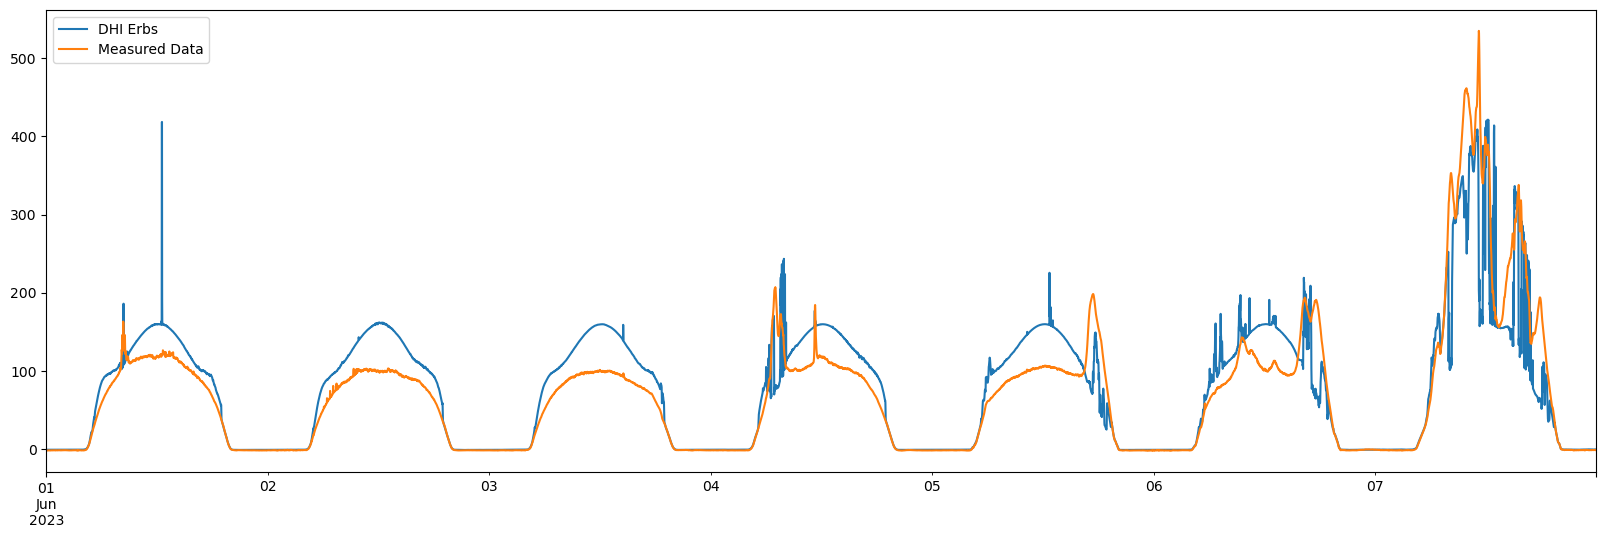

In [16]:
out_erbs['dhi_erbs'].plot(label = 'DHI Erbs', figsize=(20,6))
df_weather['dhi'].plot(label = 'Measured Data')
plt.legend()
plt.show()

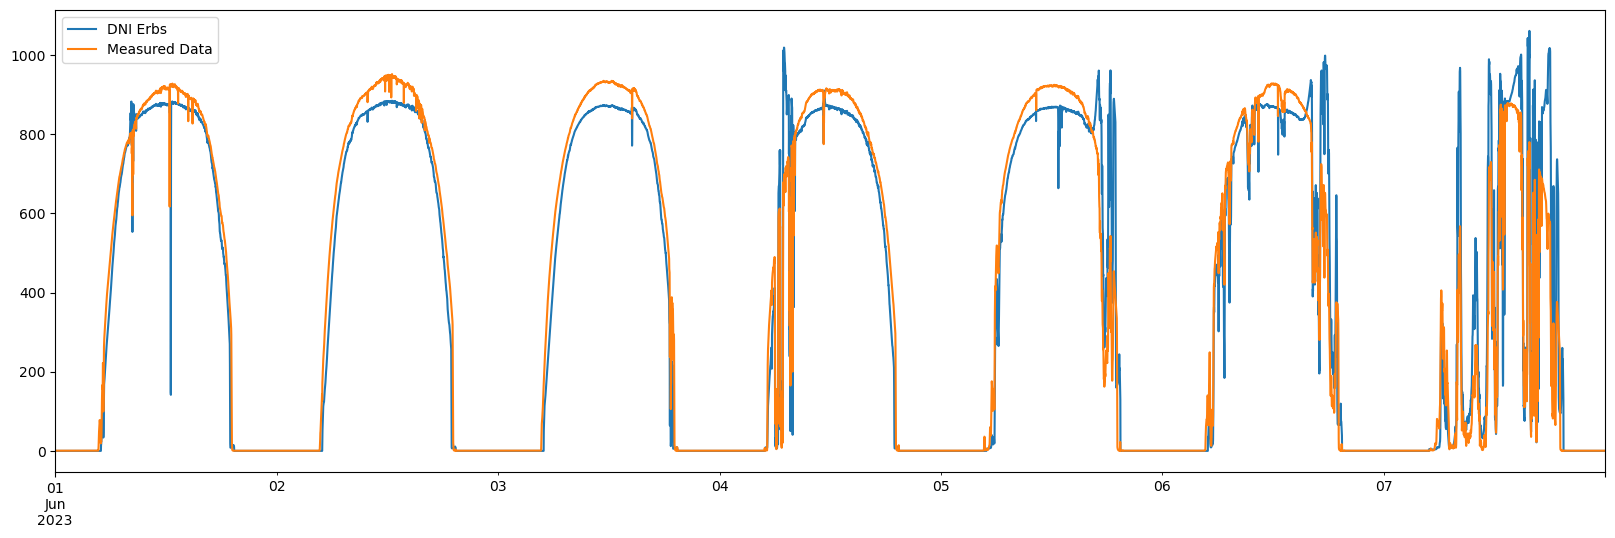

In [17]:
out_erbs['dni_erbs'].plot(label = 'DNI Erbs', figsize=(20,6))
df_weather['dni'].plot(label = 'Measured Data')
plt.legend()
plt.show()

In [18]:
#Modelagem de Decomposição com outros modelos de decomposição
#DISC
out_disc = irradiance.disc(
    df_weather['ghi'], solpos.zenith, df_weather.index, df_weather['air_pressure']*100)
# use "complete sum" AKA "closure" equations: DHI = GHI - DNI * cos(zenith)
df_disc = irradiance.complete_irradiance(
    solar_zenith=solpos.apparent_zenith, ghi=df_weather['ghi'], dni=out_disc.dni,
    dhi=None)
out_disc = out_disc.rename(columns={'dni': 'dni_disc'})
out_disc['dhi_disc'] = df_disc.dhi

#BOLAND
out_boland = irradiance.boland(df_weather['ghi'], solpos.zenith, df_weather.index)
out_boland = out_boland.rename(
    columns={'dni': 'dni_boland', 'dhi': 'dhi_boland'})

#DIRINT
dni_dirint = irradiance.dirint(
    df_weather['ghi'], solpos.zenith, df_weather.index, df_weather['air_pressure']*100,
    temp_dew=None)
# use "complete sum" AKA "closure" equation: DHI = GHI - DNI * cos(zenith)
df_dirint = irradiance.complete_irradiance(
    solar_zenith=solpos.apparent_zenith, ghi=df_weather['ghi'], dni=dni_dirint,
    dhi=None)
out_dirint = pd.DataFrame(
    {'dni_dirint': dni_dirint, 'dhi_dirint': df_dirint.dhi},
    index=df_weather.index)

781787.5009696577
620669.2820011738
718776.0570703801
896996.634138458
690976.412


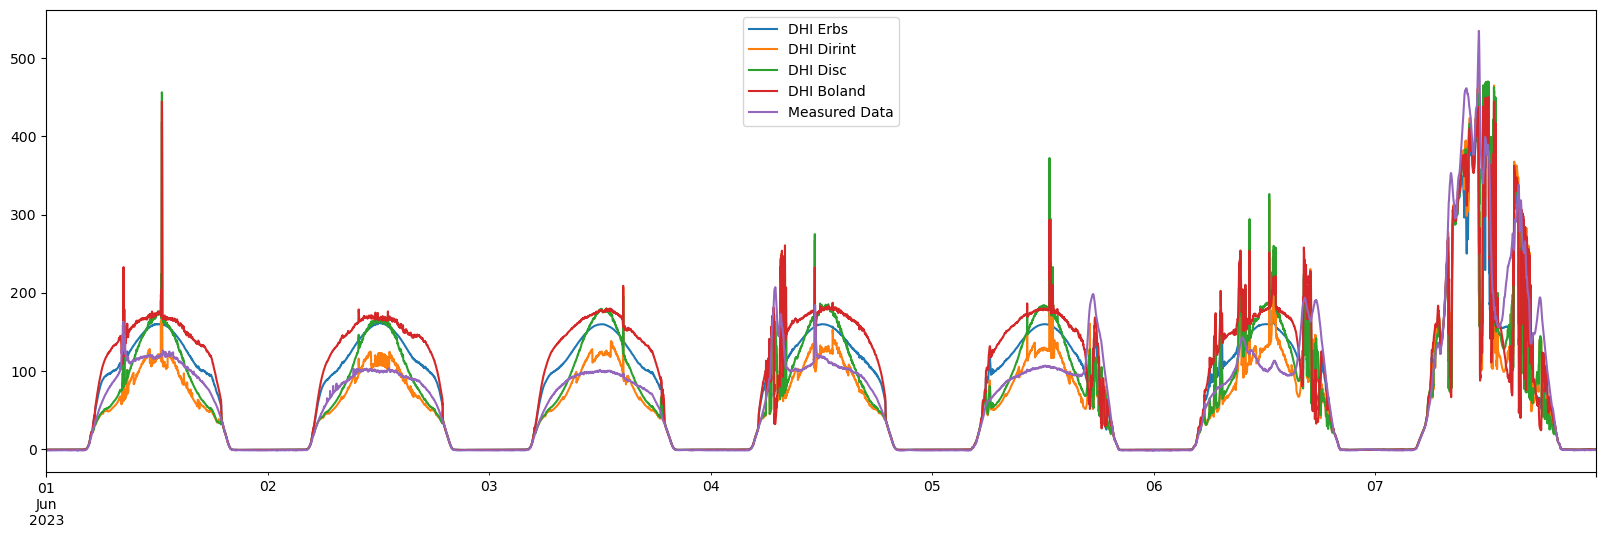

In [19]:
#Comparando DHI
out_erbs['dhi_erbs'].plot(label = 'DHI Erbs', figsize=(20,6))
out_dirint['dhi_dirint'].plot(label = 'DHI Dirint')
out_disc['dhi_disc'].plot(label = 'DHI Disc')
out_boland['dhi_boland'].plot(label = 'DHI Boland')
df_weather['dhi'].plot(label = 'Measured Data')
print(out_erbs['dhi_erbs'].sum())
print(out_dirint['dhi_dirint'].sum())
print(out_disc['dhi_disc'].sum())
print(out_boland['dhi_boland'].sum())
print(df_weather['dhi'].sum())
plt.legend()
plt.show()

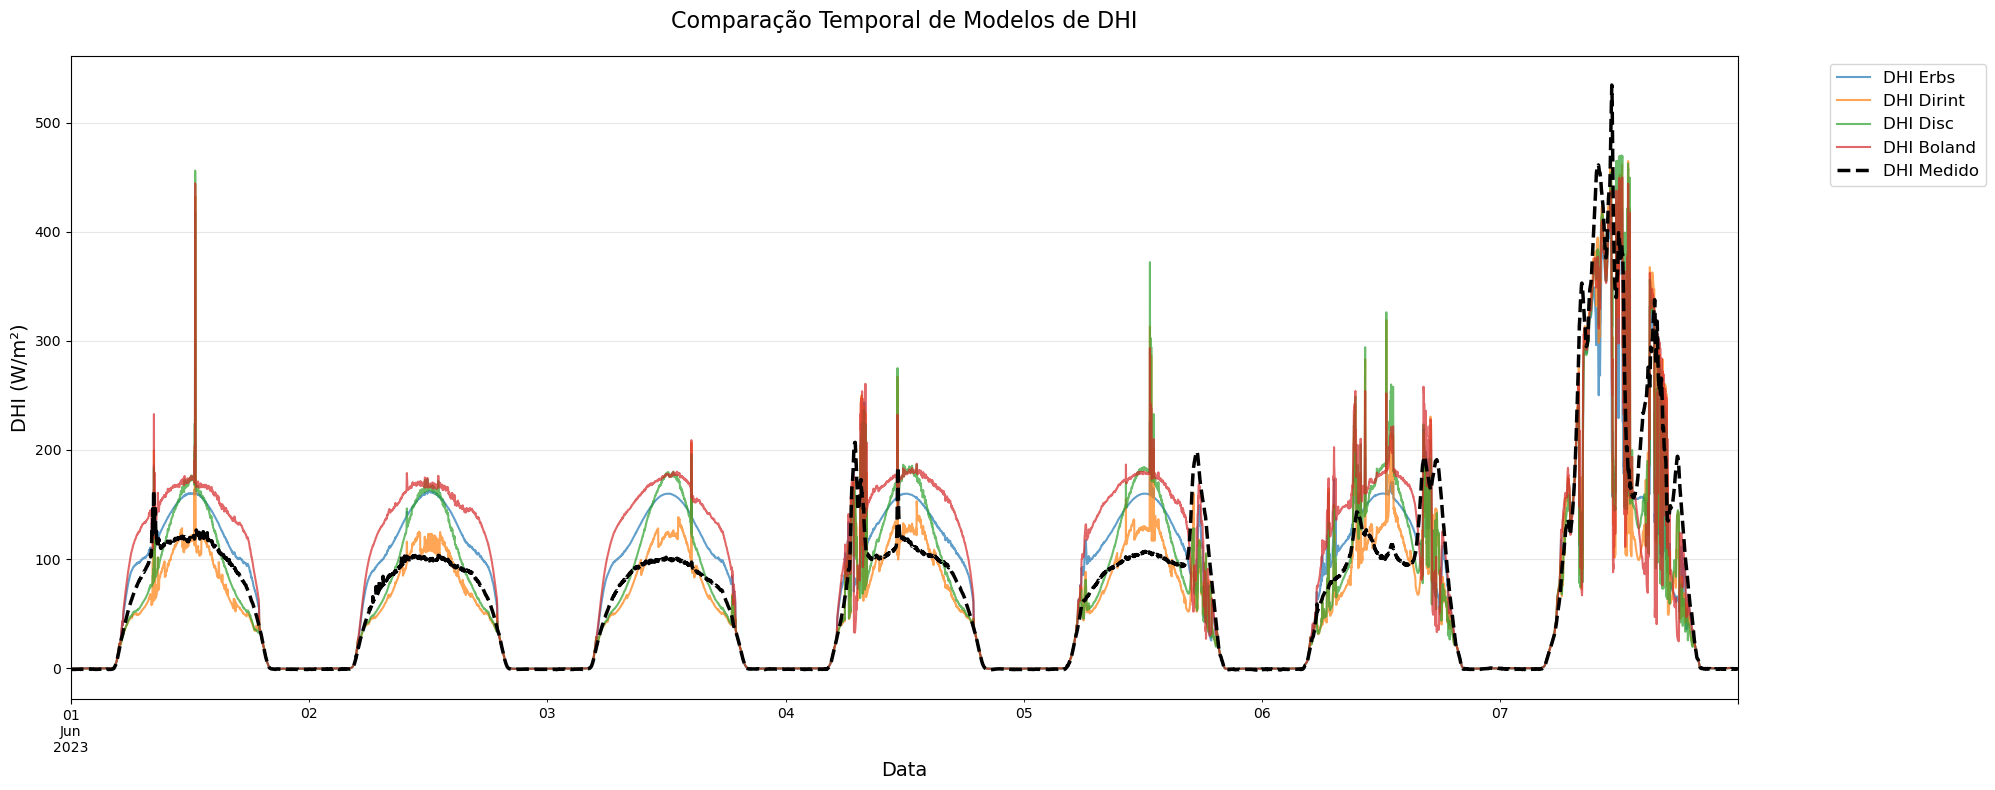


=== Métricas de Desempenho ===
               RMSE (W/m²)  MAE (W/m²)   R²  Bias (W/m²)  \
DHI Erbs             38.68       23.36 0.77         9.01   
DHI Dirint           41.09       24.96 0.71       -11.46   
DHI Disc             39.05       21.40 0.76         2.76   
DHI Boland           50.66       33.80 0.60        20.44   
Dados Medidos          NaN         NaN  NaN          NaN   

               Energia Total (Wh/m²)  
DHI Erbs                   781787.50  
DHI Dirint                 620669.28  
DHI Disc                   718776.06  
DHI Boland                 896996.63  
Dados Medidos              690976.41  


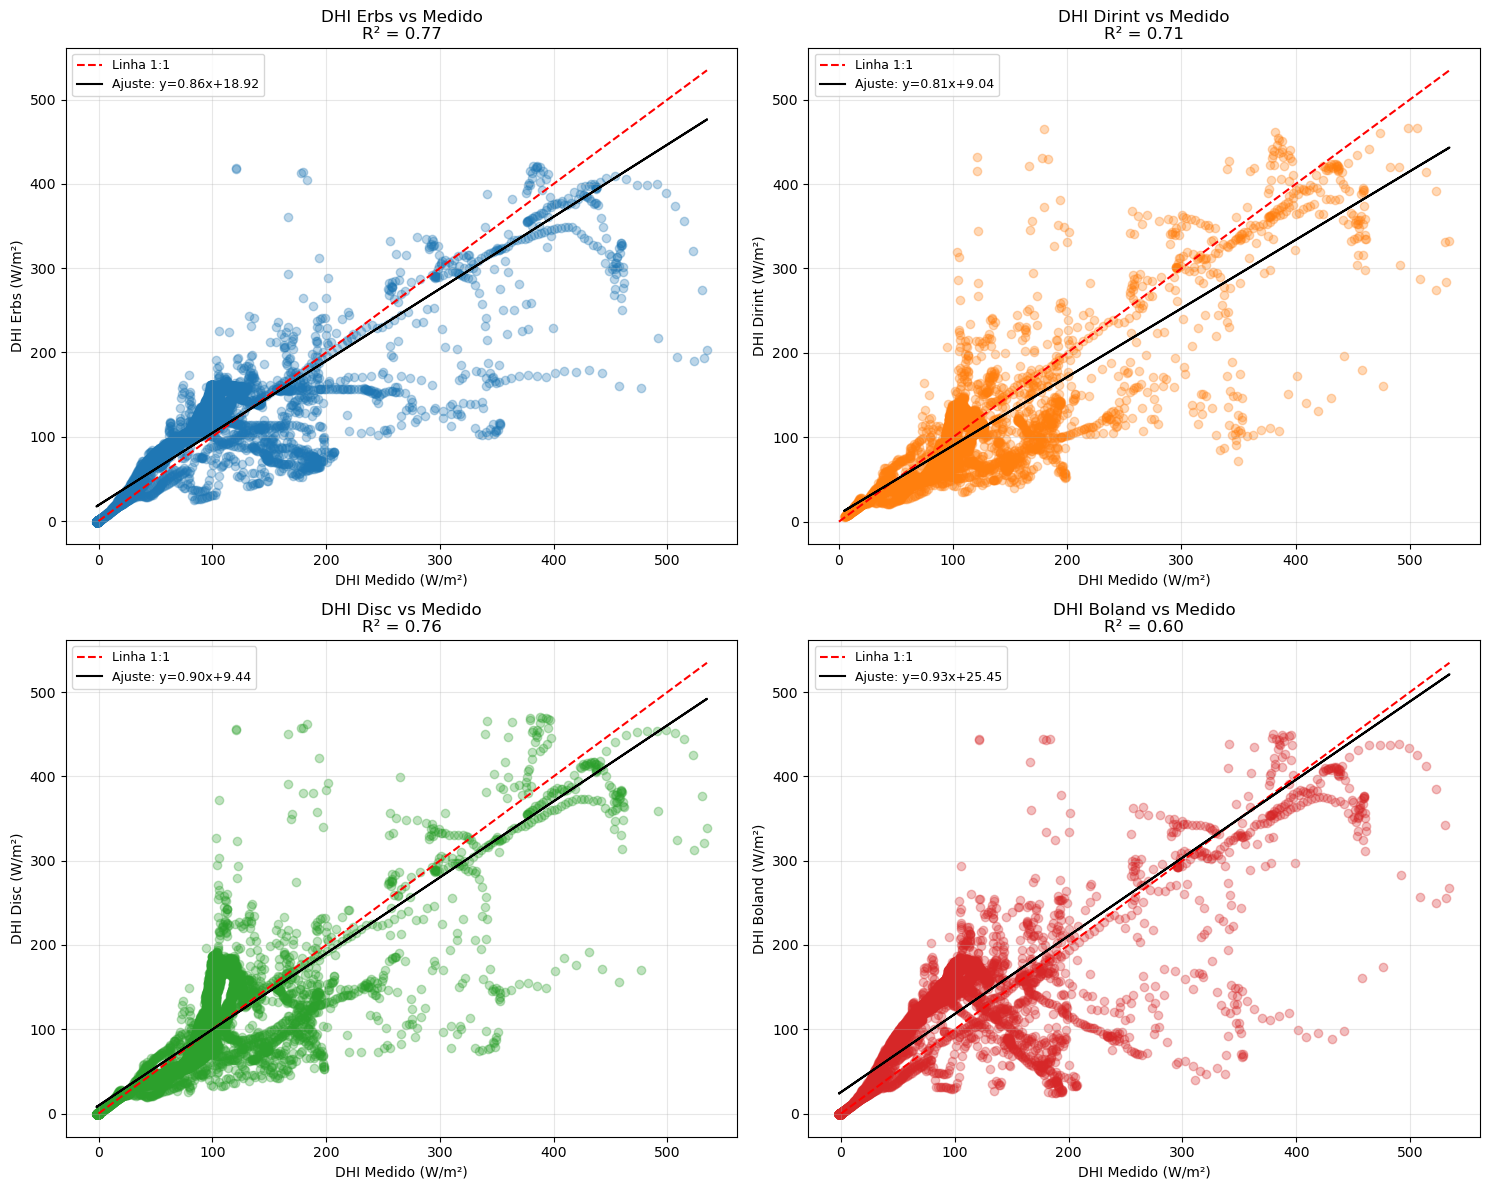


Aviso: Não foi possível calcular KDE para DHI Erbs. Erro: name 'gaussian_kde' is not defined

Aviso: Não foi possível calcular KDE para DHI Dirint. Erro: name 'gaussian_kde' is not defined

Aviso: Não foi possível calcular KDE para DHI Disc. Erro: name 'gaussian_kde' is not defined

Aviso: Não foi possível calcular KDE para DHI Boland. Erro: name 'gaussian_kde' is not defined


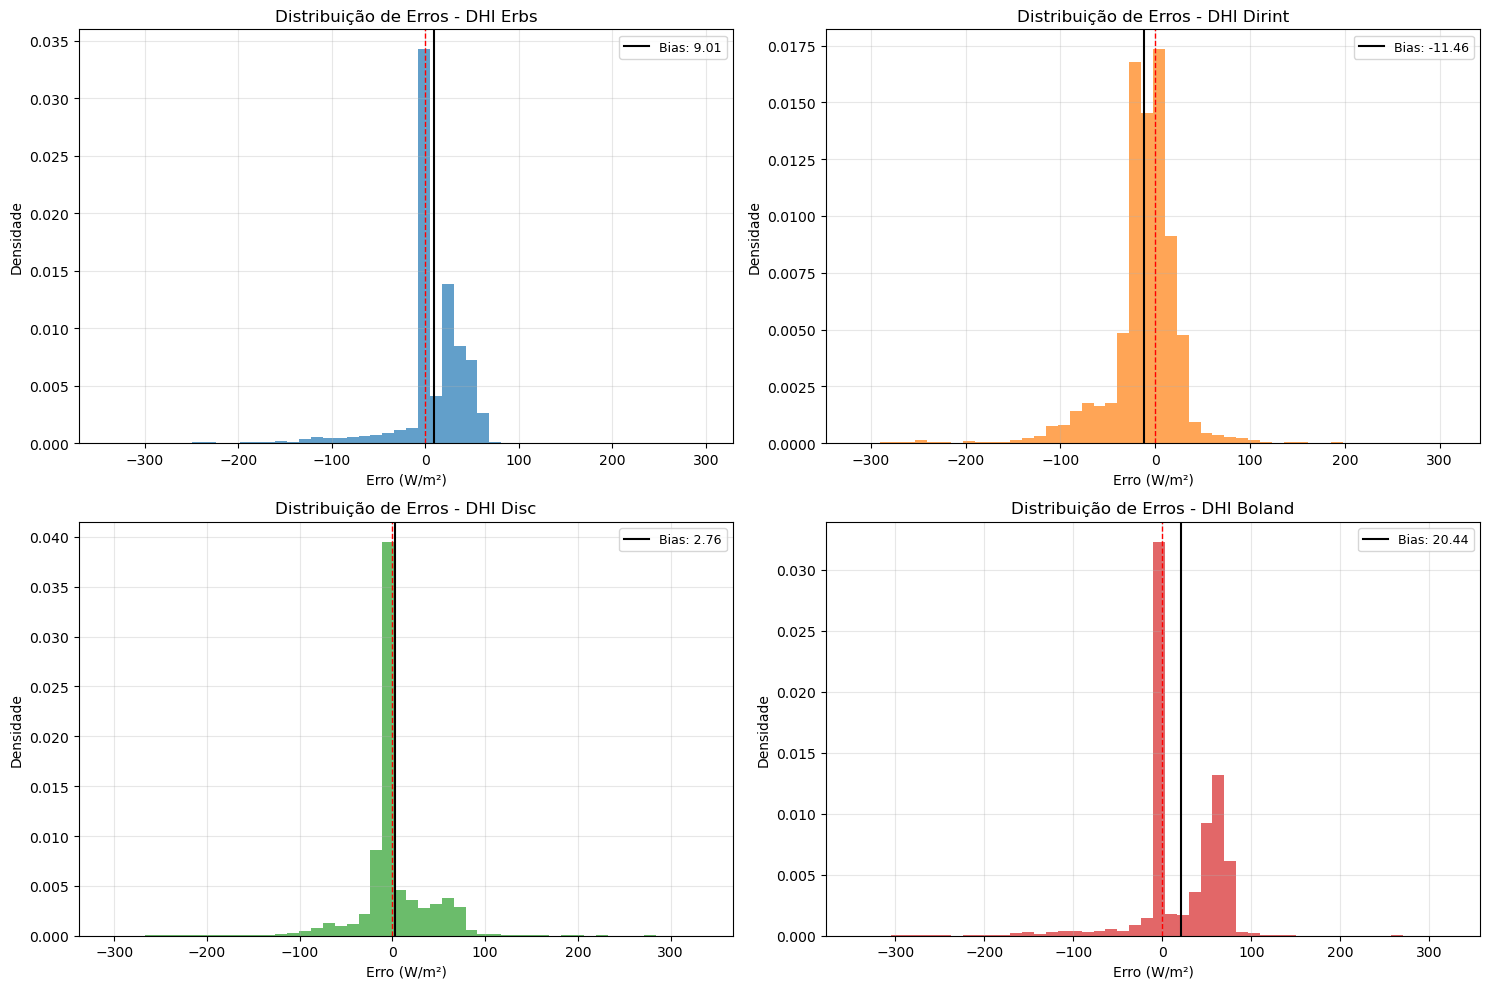

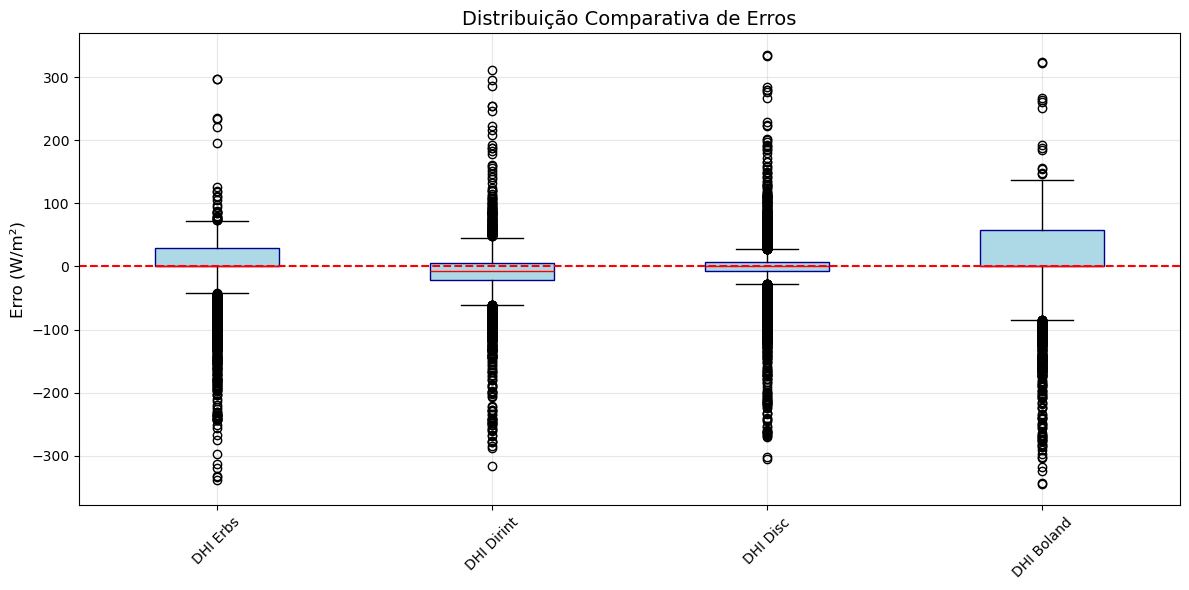

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dados dos modelos
models = {
    'DHI Erbs': out_erbs['dhi_erbs'],
    'DHI Dirint': out_dirint['dhi_dirint'],
    'DHI Disc': out_disc['dhi_disc'],
    'DHI Boland': out_boland['dhi_boland']
}

# Dados medidos
measured = df_weather['dhi']

# 1. Plot comparativo temporal
plt.figure(figsize=(20, 8))
for name, model in models.items():
    model.plot(label=name, alpha=0.7, linewidth=1.5)
measured.plot(label='DHI Medido', color='black', linewidth=2.5, style='--')
plt.title('Comparação Temporal de Modelos de DHI', fontsize=16, pad=20)
plt.xlabel('Data', fontsize=14)
plt.ylabel('DHI (W/m²)', fontsize=14)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Cálculo das métricas
metrics = pd.DataFrame(columns=['RMSE (W/m²)', 'MAE (W/m²)', 'R²', 'Bias (W/m²)', 'Energia Total (Wh/m²)'])

for name, model in models.items():
    valid_idx = measured.notna() & model.notna()
    y_true = measured[valid_idx]
    y_pred = model[valid_idx]
    
    metrics.loc[name] = {
        'RMSE (W/m²)': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE (W/m²)': mean_absolute_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred),
        'Bias (W/m²)': np.mean(y_pred - y_true),
        'Energia Total (Wh/m²)': model.sum()
    }

# Adicionando dados medidos
metrics.loc['Dados Medidos'] = {
    'RMSE (W/m²)': np.nan,
    'MAE (W/m²)': np.nan,
    'R²': np.nan,
    'Bias (W/m²)': np.nan,
    'Energia Total (Wh/m²)': measured.sum()
}

# 3. Exibição das métricas com formatação
pd.set_option('display.float_format', '{:.2f}'.format)
print("\n=== Métricas de Desempenho ===")
print(metrics)

# 4. Gráficos de dispersão com ajuste linear
plt.figure(figsize=(15, 12))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    
    valid_idx = measured.notna() & model.notna()
    x = measured[valid_idx]
    y = model[valid_idx]
    
    plt.scatter(x, y, alpha=0.3, color=plt.cm.tab10(i-1))
    plt.plot([0, max(x)], [0, max(x)], 'r--', label='Linha 1:1')
    
    coef = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(x, poly1d_fn(x), 'k-', label=f'Ajuste: y={coef[0]:.2f}x+{coef[1]:.2f}')
    
    plt.xlabel('DHI Medido (W/m²)', fontsize=10)
    plt.ylabel(f'{name} (W/m²)', fontsize=10)
    plt.title(f'{name} vs Medido\nR² = {metrics.loc[name, "R²"]:.2f}', fontsize=12)
    plt.legend(fontsize=9)
    plt.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

# 5. Análise de distribuição de erros (Versão corrigida)
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    error = model - measured
    
    # Tratamento robusto dos dados de erro
    clean_error = error.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Verificação se há dados válidos
    if len(clean_error) == 0:
        print(f"\nAviso: Não há dados válidos para {name}. Pulando gráfico.")
        continue
    
    plt.subplot(2, 2, i)
    
    # Histograma com densidade
    n, bins, patches = plt.hist(clean_error, bins=50, density=True, 
                              alpha=0.7, color=plt.cm.tab10(i-1))
    
    # Linhas de referência
    plt.axvline(x=0, color='r', linestyle='--', linewidth=1)
    current_bias = np.mean(clean_error)
    plt.axvline(x=current_bias, color='k', 
               linestyle='-', linewidth=1.5, label=f'Bias: {current_bias:.2f}')
    
    # Curva KDE (com tratamento de erro adicional)
    try:
        kde = gaussian_kde(clean_error)
        x_vals = np.linspace(min(clean_error), max(clean_error), 100)
        plt.plot(x_vals, kde(x_vals), 'b-', linewidth=1.5)
    except Exception as e:
        print(f"\nAviso: Não foi possível calcular KDE para {name}. Erro: {str(e)}")
    
    plt.title(f'Distribuição de Erros - {name}', fontsize=12)
    plt.xlabel('Erro (W/m²)', fontsize=10)
    plt.ylabel('Densidade', fontsize=10)
    plt.legend(fontsize=9)
    plt.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

# 6. Boxplot comparativo de erros (Versão corrigida)
plt.figure(figsize=(12, 6))
all_errors = []
labels = []
for name, model in models.items():
    error = model - measured
    clean_error = error.replace([np.inf, -np.inf], np.nan).dropna()
    
    if len(clean_error) > 0:  # Só adiciona se houver dados válidos
        all_errors.append(clean_error)
        labels.append(name)

if len(all_errors) > 0:  # Só plota se houver dados válidos
    plt.boxplot(all_errors, labels=labels, patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='darkblue'),
               medianprops=dict(color='red'))
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Distribuição Comparativa de Erros', fontsize=14)
    plt.ylabel('Erro (W/m²)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\nAviso: Não há dados válidos para gerar o boxplot comparativo.")

3995065.34279462
4328128.028381213
4215044.768322099
3783049.6401230884
4099999.775


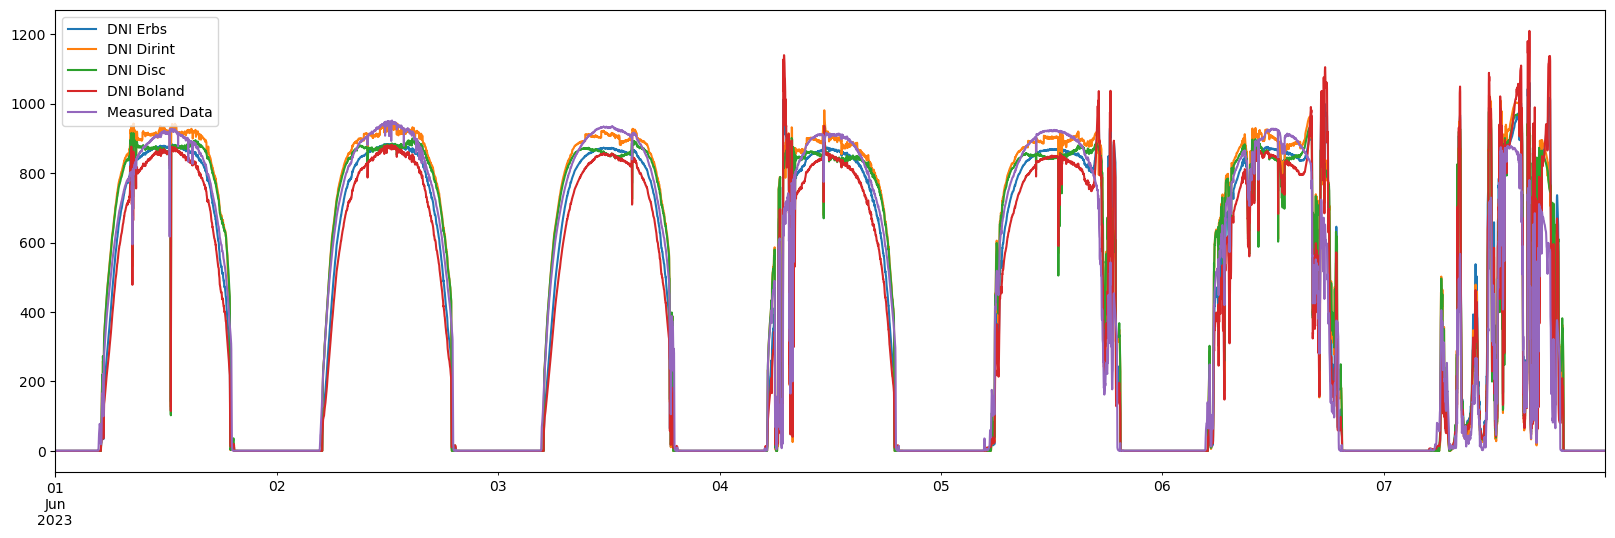

In [21]:
#Comparando DNI
out_erbs['dni_erbs'].plot(label = 'DNI Erbs', figsize=(20,6))
out_dirint['dni_dirint'].plot(label = 'DNI Dirint')
out_disc['dni_disc'].plot(label = 'DNI Disc')
out_boland['dni_boland'].plot(label = 'DNI Boland')
df_weather['dni'].plot(label = 'Measured Data')
print(out_erbs['dni_erbs'].sum())
print(out_dirint['dni_dirint'].sum())
print(out_disc['dni_disc'].sum())
print(out_boland['dni_boland'].sum())
print(df_weather['dni'].sum())
plt.legend()
plt.show()

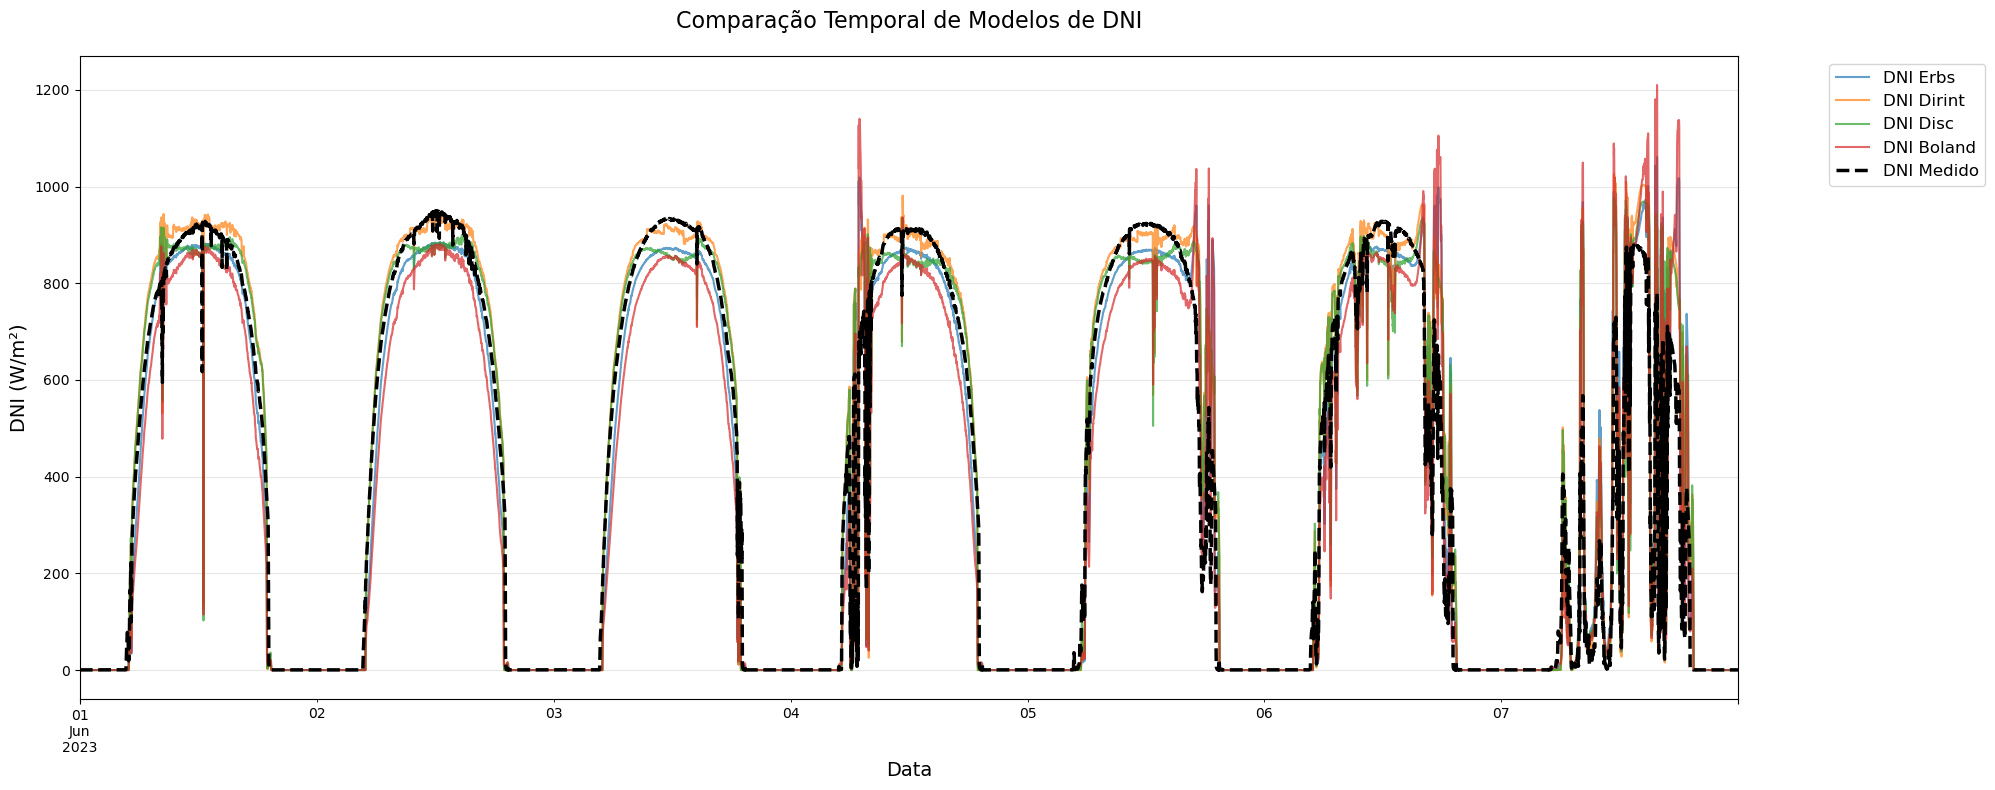


=== Métricas de Desempenho ===
               RMSE (W/m²)  MAE (W/m²)   R²  Bias (W/m²)  \
DNI Erbs             82.42       45.07 0.96       -10.41   
DNI Dirint           95.47       58.82 0.91        36.12   
DNI Disc             79.33       41.55 0.96        11.41   
DNI Boland           99.60       62.98 0.94       -31.44   
Dados Medidos          NaN         NaN  NaN          NaN   

               Energia Total (Wh/m²)  
DNI Erbs                  3995065.34  
DNI Dirint                4328128.03  
DNI Disc                  4215044.77  
DNI Boland                3783049.64  
Dados Medidos             4099999.77  


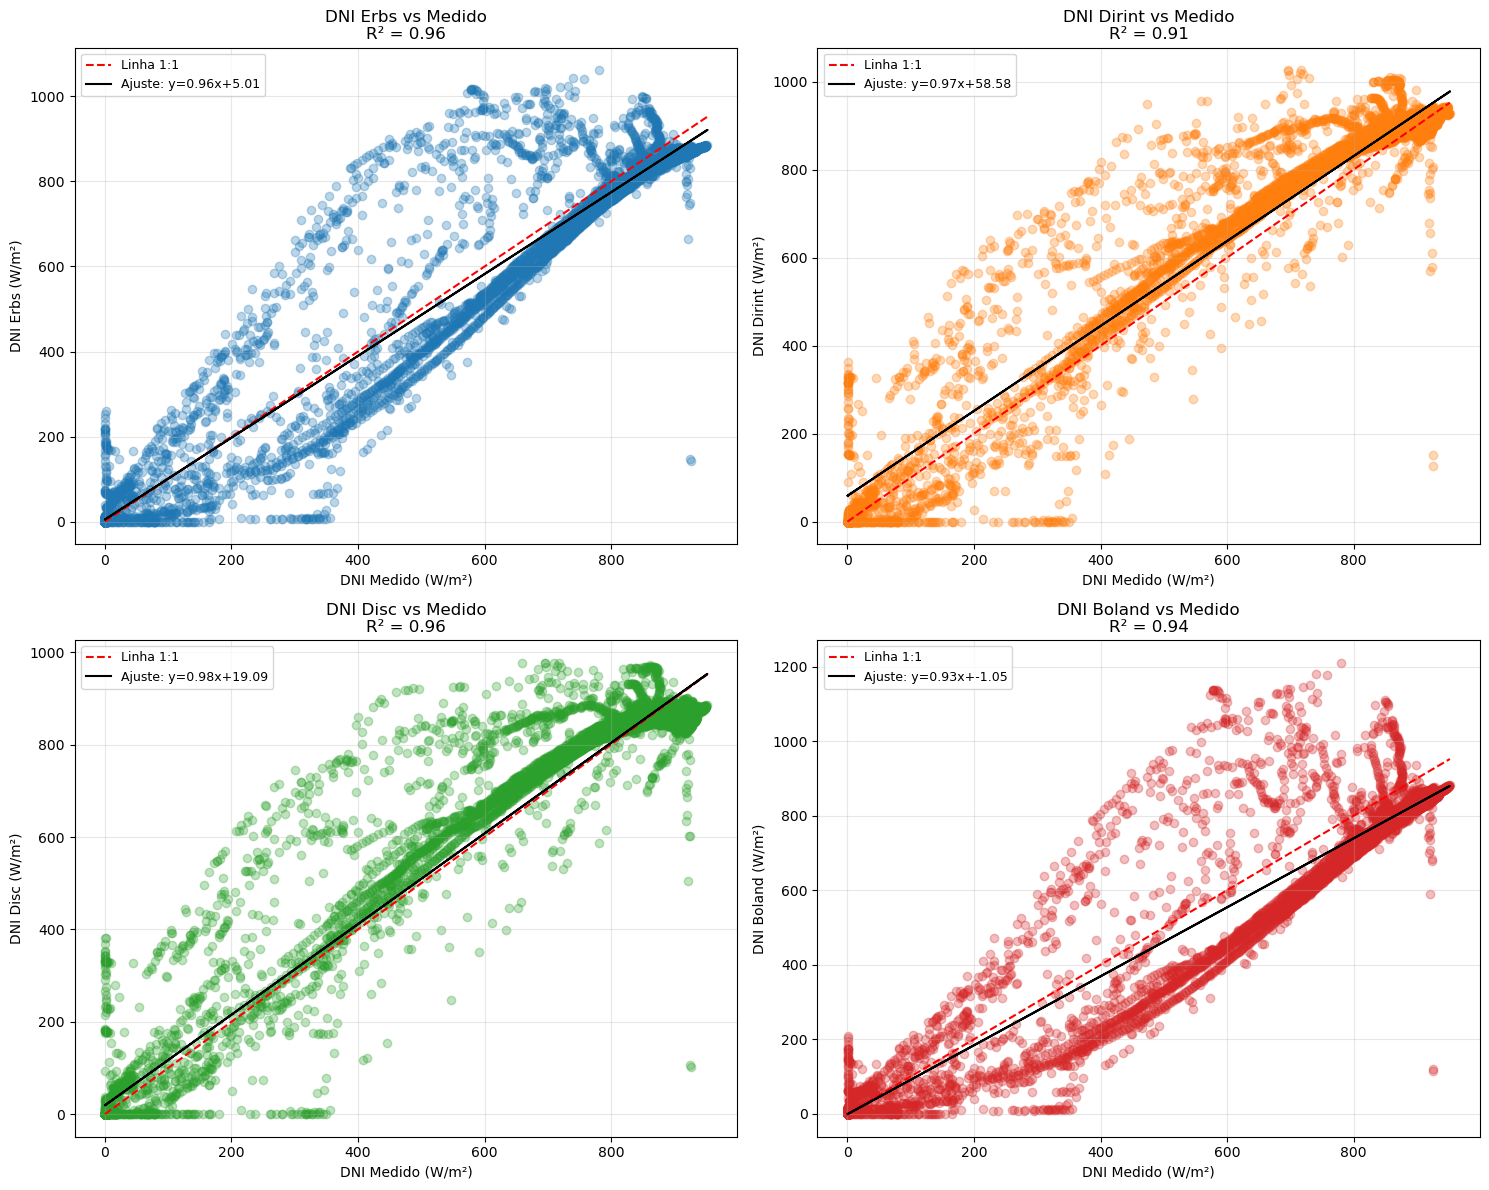

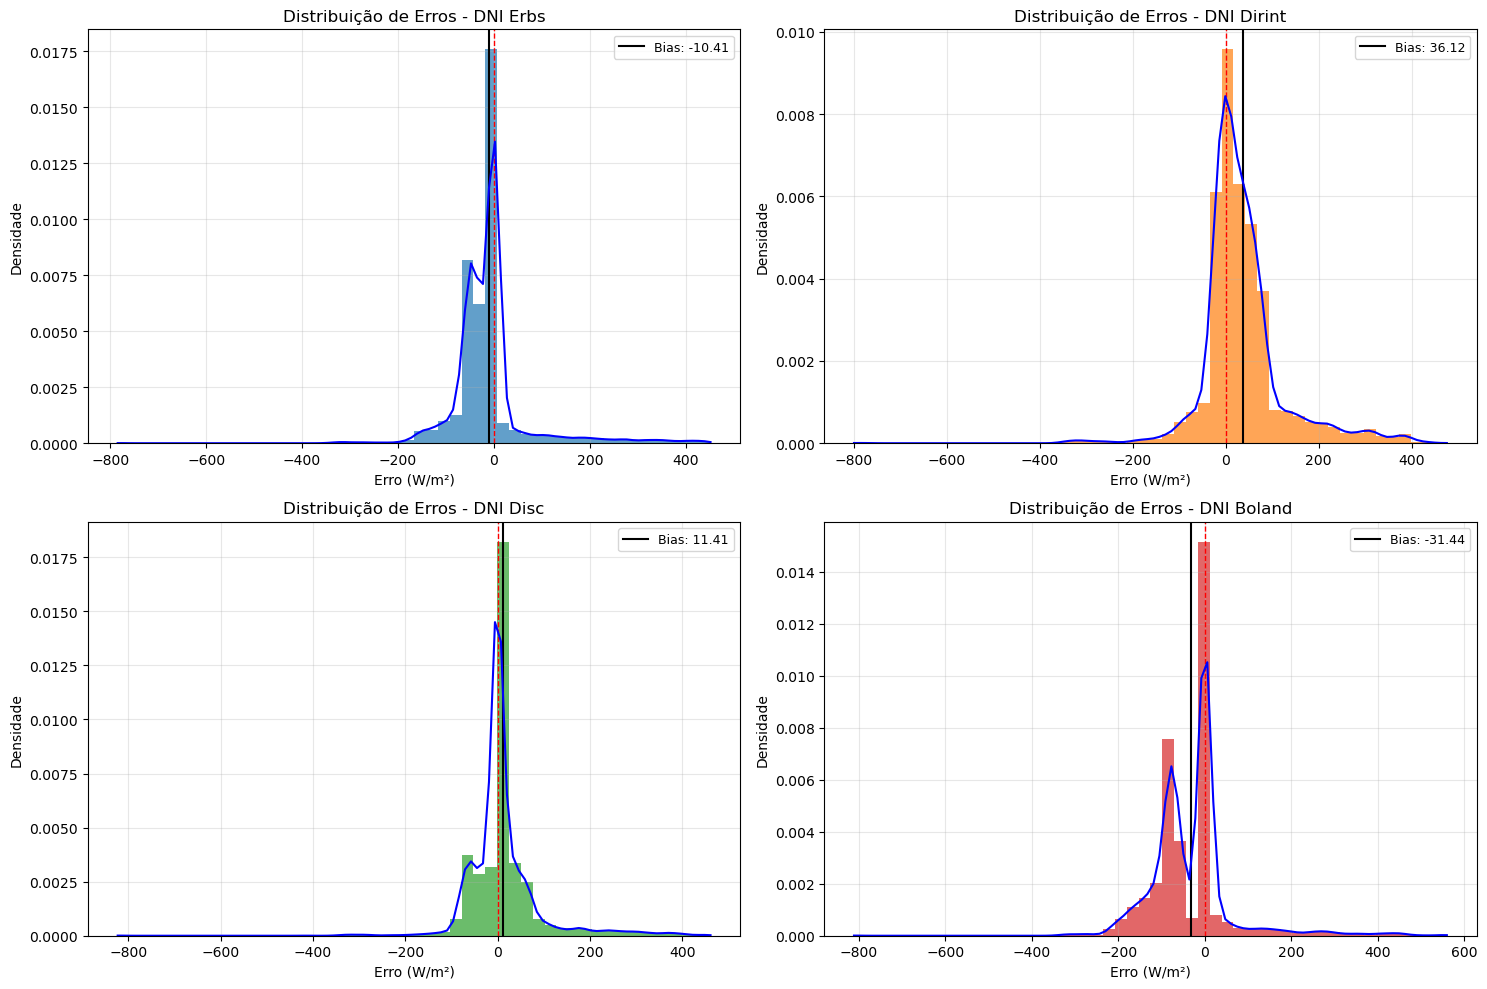

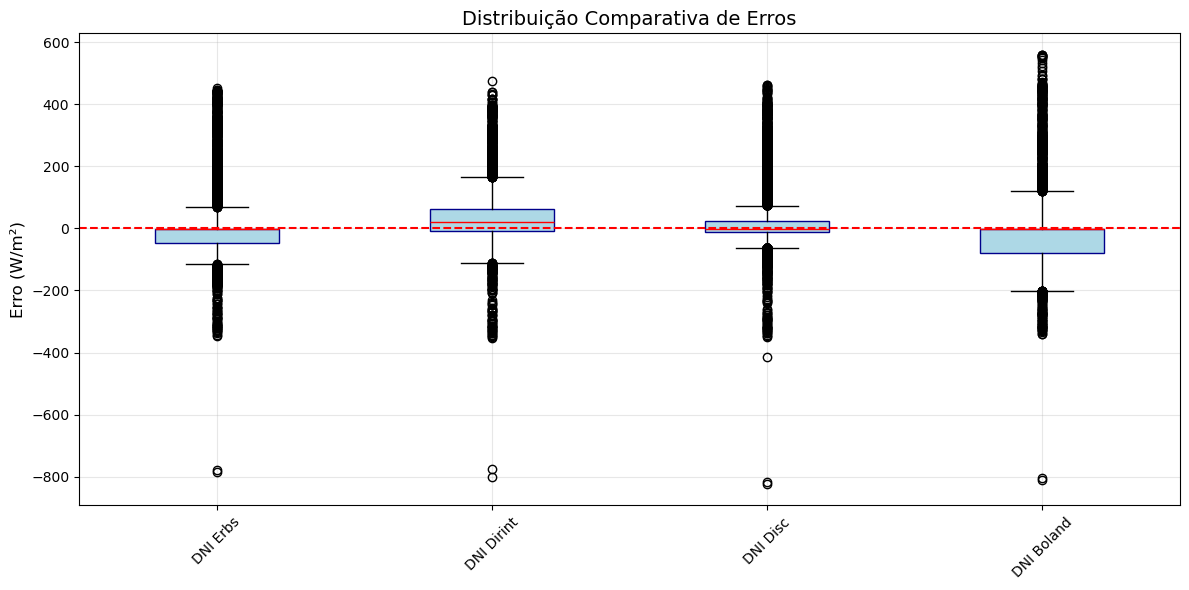

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import gaussian_kde

# Dados dos modelos
models = {
    'DNI Erbs': out_erbs['dni_erbs'],
    'DNI Dirint': out_dirint['dni_dirint'],
    'DNI Disc': out_disc['dni_disc'],
    'DNI Boland': out_boland['dni_boland']
}

# Dados medidos
measured = df_weather['dni']

# 1. Plot comparativo temporal
plt.figure(figsize=(20, 8))
for name, model in models.items():
    model.plot(label=name, alpha=0.7, linewidth=1.5)
measured.plot(label='DNI Medido', color='black', linewidth=2.5, style='--')
plt.title('Comparação Temporal de Modelos de DNI', fontsize=16, pad=20)
plt.xlabel('Data', fontsize=14)
plt.ylabel('DNI (W/m²)', fontsize=14)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Cálculo das métricas
metrics = pd.DataFrame(columns=['RMSE (W/m²)', 'MAE (W/m²)', 'R²', 'Bias (W/m²)', 'Energia Total (Wh/m²)'])

for name, model in models.items():
    # Limpeza robusta dos dados
    valid_idx = measured.notna() & model.notna() & ~np.isinf(model)
    y_true = measured[valid_idx]
    y_pred = model[valid_idx]
    
    # Verificação se há dados suficientes
    if len(y_true) < 2:
        print(f"\nAviso: Dados insuficientes para {name}. Métricas não calculadas.")
        metrics.loc[name] = {col: np.nan for col in metrics.columns}
        continue
    
    metrics.loc[name] = {
        'RMSE (W/m²)': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE (W/m²)': mean_absolute_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred),
        'Bias (W/m²)': np.mean(y_pred - y_true),
        'Energia Total (Wh/m²)': model.sum()
    }

# Adicionando dados medidos
metrics.loc['Dados Medidos'] = {
    'RMSE (W/m²)': np.nan,
    'MAE (W/m²)': np.nan,
    'R²': np.nan,
    'Bias (W/m²)': np.nan,
    'Energia Total (Wh/m²)': measured.sum()
}

# 3. Exibição das métricas com formatação
pd.set_option('display.float_format', '{:.2f}'.format)
print("\n=== Métricas de Desempenho ===")
print(metrics)

# 4. Gráficos de dispersão com ajuste linear
plt.figure(figsize=(15, 12))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    
    # Limpeza robusta dos dados
    valid_idx = measured.notna() & model.notna() & ~np.isinf(model) & ~np.isinf(measured)
    x = measured[valid_idx]
    y = model[valid_idx]
    
    # Verificação se há dados suficientes
    if len(x) < 2:
        plt.text(0.5, 0.5, 'Dados insuficientes', ha='center', va='center')
        plt.title(f'{name} (Dados insuficientes)')
        continue
    
    # Plot
    plt.scatter(x, y, alpha=0.3, color=plt.cm.tab10(i-1))
    plt.plot([0, max(x)], [0, max(x)], 'r--', label='Linha 1:1')
    
    # Ajuste linear com tratamento de erro
    try:
        coef = np.polyfit(x, y, 1)
        poly1d_fn = np.poly1d(coef)
        plt.plot(x, poly1d_fn(x), 'k-', label=f'Ajuste: y={coef[0]:.2f}x+{coef[1]:.2f}')
        r2 = r2_score(x, y)
    except:
        r2 = np.nan
    
    plt.xlabel('DNI Medido (W/m²)', fontsize=10)
    plt.ylabel(f'{name} (W/m²)', fontsize=10)
    plt.title(f'{name} vs Medido\nR² = {r2:.2f}' if not np.isnan(r2) else f'{name} vs Medido', fontsize=12)
    plt.legend(fontsize=9)
    plt.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

# 5. Análise de distribuição de erros (Versão robusta)
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    error = model - measured
    
    # Limpeza robusta dos erros
    clean_error = error.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Verificação se há dados válidos
    if len(clean_error) == 0:
        plt.subplot(2, 2, i)
        plt.text(0.5, 0.5, 'Dados insuficientes', ha='center', va='center')
        plt.title(f'Distribuição de Erros - {name}')
        continue
    
    plt.subplot(2, 2, i)
    
    # Histograma com densidade
    n, bins, patches = plt.hist(clean_error, bins=50, density=True, 
                              alpha=0.7, color=plt.cm.tab10(i-1))
    
    # Linhas de referência
    plt.axvline(x=0, color='r', linestyle='--', linewidth=1)
    current_bias = np.mean(clean_error)
    plt.axvline(x=current_bias, color='k', 
               linestyle='-', linewidth=1.5, label=f'Bias: {current_bias:.2f}')
    
    # Curva KDE com tratamento de erro
    try:
        kde = gaussian_kde(clean_error)
        x_vals = np.linspace(min(clean_error), max(clean_error), 100)
        plt.plot(x_vals, kde(x_vals), 'b-', linewidth=1.5)
    except Exception as e:
        print(f"\nAviso: Não foi possível calcular KDE para {name}. Erro: {str(e)}")
    
    plt.title(f'Distribuição de Erros - {name}', fontsize=12)
    plt.xlabel('Erro (W/m²)', fontsize=10)
    plt.ylabel('Densidade', fontsize=10)
    plt.legend(fontsize=9)
    plt.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

# 6. Boxplot comparativo de erros (Versão robusta)
plt.figure(figsize=(12, 6))
all_errors = []
labels = []
for name, model in models.items():
    error = model - measured
    clean_error = error.replace([np.inf, -np.inf], np.nan).dropna()
    
    if len(clean_error) > 0:  # Só adiciona se houver dados válidos
        all_errors.append(clean_error)
        labels.append(name)

if len(all_errors) > 0:  # Só plota se houver dados válidos
    plt.boxplot(all_errors, labels=labels, patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='darkblue'),
               medianprops=dict(color='red'))
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Distribuição Comparativa de Erros', fontsize=14)
    plt.ylabel('Erro (W/m²)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\nAviso: Não há dados válidos para gerar o boxplot comparativo.")

#### Exercício 2 para Casa
- Analisem os resultados e comentem sobre seus principais insights em relação ao comparativo de modelos de decomposição com os dados medidos. 

### Exercício 3 - Cálculo de Irradiância no Plano do Módulo (POA) em um Sistema com Instalação Fixa

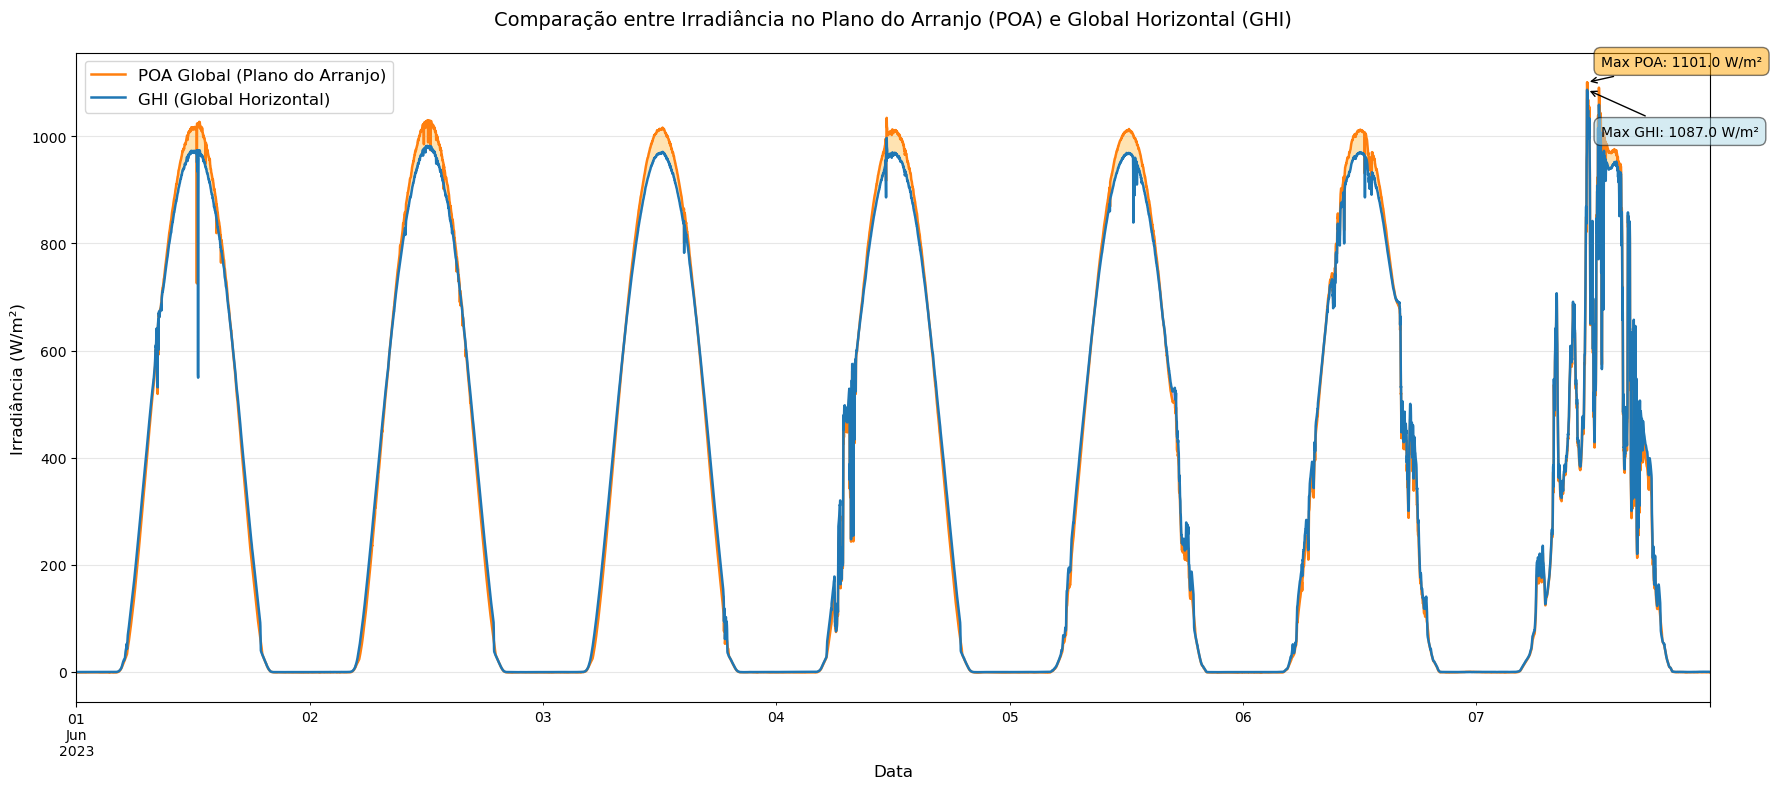


=== Métricas Comparativas ===
     Máximo (W/m²)  Média (W/m²)  Energia Total (kWh/m²)
POA        1100.97        349.78                 3525.76
GHI        1087.00        347.52                 3502.97


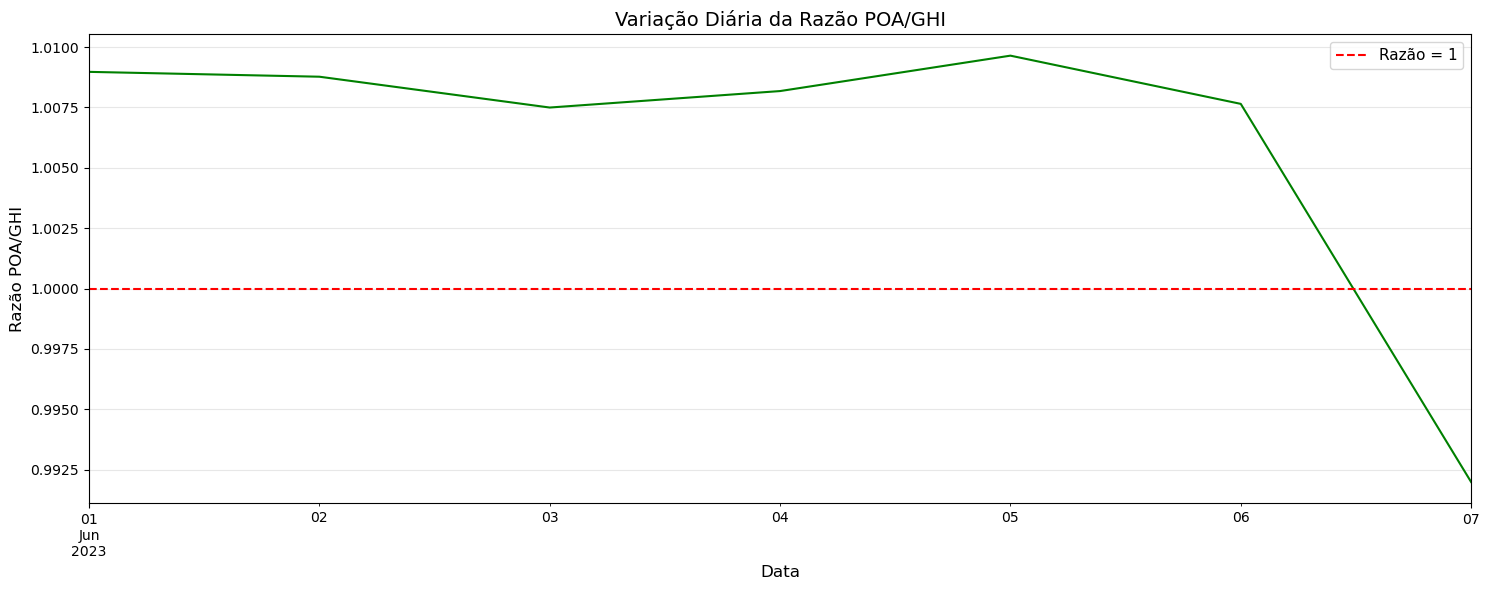

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

latitude=44.0467
longitude=-123.0743
altitude=133.8


surface_tilt = 10
surface_azimuth = 180
solar_zenith = solpos['zenith']
solar_azimuth = solpos['azimuth']
dni = df_weather['dni']
ghi = df_weather['ghi']
dhi = df_weather['dhi']
dni_extra = pvlib.irradiance.get_extra_radiation(df_weather.index)
airmass_relative = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(altitude = altitude)
airmass = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure)

POA_Irradiance = pvlib.irradiance.get_total_irradiance(surface_tilt,
                                                  surface_azimuth,
                                                  solar_zenith,
                                                  solar_azimuth,
                                                  dni,
                                                  ghi,
                                                  dhi,
                                                  dni_extra=dni_extra,
                                                  airmass=airmass,
                                                  albedo=0.25,
                                                  surface_type=None,
                                                  model='isotropic', #'isotropic', 'klucher', 'haydavies', 'reindl', 'king', 'perez', 'perez-driesse'
                                                  model_perez='allsitescomposite1990') #Used only for Perez Model)
# Dados
poa = POA_Irradiance['poa_global']
ghi = df_weather['ghi']

# 1. Plot comparativo temporal aprimorado
plt.figure(figsize=(18, 8))
ax = plt.gca()

# Plot das séries com preenchimento entre elas
poa.plot(label='POA Global (Plano do Arranjo)', color='#FF7F0E', linewidth=1.8, ax=ax)
ghi.plot(label='GHI (Global Horizontal)', color='#1F77B4', linewidth=1.8, ax=ax)
plt.fill_between(poa.index, poa, ghi, where=(poa >= ghi), 
                facecolor='orange', alpha=0.3, interpolate=True)
plt.fill_between(poa.index, poa, ghi, where=(poa < ghi), 
                facecolor='blue', alpha=0.3, interpolate=True)

# Configurações do gráfico
plt.title('Comparação entre Irradiância no Plano do Arranjo (POA) e Global Horizontal (GHI)', 
          fontsize=14, pad=20)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Irradiância (W/m²)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Adicionando anotações de valores máximos
max_poa = poa.max()
max_ghi = ghi.max()
plt.annotate(f'Max POA: {max_poa:.1f} W/m²', 
             xy=(poa.idxmax(), max_poa), xytext=(10, 10),
             textcoords='offset points', ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.5),
             arrowprops=dict(arrowstyle='->'))
plt.annotate(f'Max GHI: {max_ghi:.1f} W/m²', 
             xy=(ghi.idxmax(), max_ghi), xytext=(10, -25),
             textcoords='offset points', ha='left', va='top',
             bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5),
             arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()

# 2. Cálculo de métricas básicas
metrics = {
    'Máximo (W/m²)': [poa.max(), ghi.max()],
    'Média (W/m²)': [poa.mean(), ghi.mean()],
    'Energia Total (kWh/m²)': [poa.sum()/1000, ghi.sum()/1000]
}

metrics_df = pd.DataFrame(metrics, index=['POA', 'GHI'])

# 3. Exibição das métricas formatadas
print("\n=== Métricas Comparativas ===")
print(metrics_df.to_string(float_format=lambda x: f"{x:.2f}"))

# 4. Análise da razão diária POA/GHI (se houver dados suficientes)
if len(poa) > 24:  # Pelo menos 1 dia de dados horários
    daily_poa = poa.resample('D').sum()/1000
    daily_ghi = ghi.resample('D').sum()/1000
    daily_ratio = daily_poa/daily_ghi
    
    plt.figure(figsize=(15, 6))
    daily_ratio.plot(color='green', linewidth=1.5)
    plt.axhline(y=1, color='r', linestyle='--', label='Razão = 1')
    plt.title('Variação Diária da Razão POA/GHI', fontsize=14)
    plt.ylabel('Razão POA/GHI', fontsize=12)
    plt.xlabel('Data', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\nDados insuficientes para análise diária (mínimo 24 horas requeridas)")

### Exercício 3 para Casa
OBS: A ideia do exercício é reproduzir a modelagem da aula no Brasil (hemisfério sul, no caso)

1) Modelar o Clearsky usando Ineichen, Simplified Solis e Haurwitz e comparar os gráficos visualmente.

2) Fazer a Transposição de irradiância para o plano do módulo (GHI -> POA). 
- Explorem os diferentes modelos e ângulos dos módulos. 
- Comecem a adotar métricas de ganho de transposição (POA/GHI). 
- Ao invés de simularem para alguns dias, simulem para um ano inteiro e façam a somatória dos pontos, convertendo irradiância (W/m²) para irradiação (Wh/m²). Dessa forma, é possível estimar o potencial energético do local. Essa é uma etapa que vão precisar para o trabalho. 
- Separem o resultado da somatória para cada mês e no fim o resultado anual. 

Obs: É importante irem fazendo em partes a modelagem FV, porque lá na frente terão guardados e prontos os códigos para usarem no trabalho de vocês. Aqui já estão estruturando o algoritmo para a modelagem de geração FV. Depois é só adotar métodos diferentes para as etapas, mas sabendo o que estão fazendo.

- A seguir temos a função pytz, onde vamos trabalhar com dados de fuso horário (em relação à londres), auxiliando na determinação do local que vocês vão modelar o clearsky

In [24]:
#pip install pytz (para VStudio, Spyder...)
#!pip install pytz (para o colab)

In [25]:
import pytz
len(pytz.all_timezones)

596

In [26]:
pytz.country_timezones('US')

['America/New_York',
 'America/Detroit',
 'America/Kentucky/Louisville',
 'America/Kentucky/Monticello',
 'America/Indiana/Indianapolis',
 'America/Indiana/Vincennes',
 'America/Indiana/Winamac',
 'America/Indiana/Marengo',
 'America/Indiana/Petersburg',
 'America/Indiana/Vevay',
 'America/Chicago',
 'America/Indiana/Tell_City',
 'America/Indiana/Knox',
 'America/Menominee',
 'America/North_Dakota/Center',
 'America/North_Dakota/New_Salem',
 'America/North_Dakota/Beulah',
 'America/Denver',
 'America/Boise',
 'America/Phoenix',
 'America/Los_Angeles',
 'America/Anchorage',
 'America/Juneau',
 'America/Sitka',
 'America/Metlakatla',
 'America/Yakutat',
 'America/Nome',
 'America/Adak',
 'Pacific/Honolulu']

In [27]:
pytz.country_timezones('BR')

['America/Noronha',
 'America/Belem',
 'America/Fortaleza',
 'America/Recife',
 'America/Araguaina',
 'America/Maceio',
 'America/Bahia',
 'America/Sao_Paulo',
 'America/Campo_Grande',
 'America/Cuiaba',
 'America/Santarem',
 'America/Porto_Velho',
 'America/Boa_Vista',
 'America/Manaus',
 'America/Eirunepe',
 'America/Rio_Branco']

In [28]:
list(filter(lambda x: 'GMT' in x, pytz.all_timezones))

['Etc/GMT',
 'Etc/GMT+0',
 'Etc/GMT+1',
 'Etc/GMT+10',
 'Etc/GMT+11',
 'Etc/GMT+12',
 'Etc/GMT+2',
 'Etc/GMT+3',
 'Etc/GMT+4',
 'Etc/GMT+5',
 'Etc/GMT+6',
 'Etc/GMT+7',
 'Etc/GMT+8',
 'Etc/GMT+9',
 'Etc/GMT-0',
 'Etc/GMT-1',
 'Etc/GMT-10',
 'Etc/GMT-11',
 'Etc/GMT-12',
 'Etc/GMT-13',
 'Etc/GMT-14',
 'Etc/GMT-2',
 'Etc/GMT-3',
 'Etc/GMT-4',
 'Etc/GMT-5',
 'Etc/GMT-6',
 'Etc/GMT-7',
 'Etc/GMT-8',
 'Etc/GMT-9',
 'Etc/GMT0',
 'GMT',
 'GMT+0',
 'GMT-0',
 'GMT0']

In [29]:
# Exemplo de localização
#Definindo a Localização do sistema
tz = 'America/Sao_Paulo'
lat, lon, alt = -22.9064, -47.0616, 680

site = location.Location(lat, lon, tz=tz)

#Intervalo de tempo para a Modelagem
start = '03-01-2024'
end = '03-02-2024'
times = pd.date_range(start, end, freq='1min', tz=site.tz)

#Valores da Posição do Sol ao longo do tempo de modelagem.
solar_position = site.get_solarposition(times=times)
solar_position

apparent_zenith  zenith  apparent_elevation  \
2024-03-01 00:00:00-03:00           149.25  149.25              -59.25   
2024-03-01 00:01:00-03:00           149.29  149.29              -59.29   
2024-03-01 00:02:00-03:00           149.32  149.32              -59.32   
2024-03-01 00:03:00-03:00           149.36  149.36              -59.36   
2024-03-01 00:04:00-03:00           149.39  149.39              -59.39   
...                                    ...     ...                 ...   
2024-03-01 23:56:00-03:00           149.46  149.46              -59.46   
2024-03-01 23:57:00-03:00           149.50  149.50              -59.50   
2024-03-01 23:58:00-03:00           149.55  149.55              -59.55   
2024-03-01 23:59:00-03:00           149.59  149.59              -59.59   
2024-03-02 00:00:00-03:00           149.63  149.63              -59.63   

                           elevation  azimuth  equation_of_time  
2024-03-01 00:00:00-03:00     -59.25   189.98            -12.27  
2024-03-01 00:01:00-03:00     -59.29   189.51            -12.27  
2024-03-01 00:02:00-03:00     -59.32   189.03            -12.27  
2024-03-01 00:03:00-03:00     -59.36   188.54            -12.27  
2024-03-01 00:04:00-03:00     -59.39   188.06            -12.27  
...                              ...      ...               ...  
2024-03-01 23:56:00-03:00     -59.46   191.94            -12.07  
2024-03-01 23:57:00-03:00     -59.50   191.46            -12.07  
2024-03-01 23:58:00-03:00     -59.55   190.98            -12.07  
2024-03-01 23:59:00-03:00     -59.59   190.49            -12.07  
2024-03-02 00:00:00-03:00     -59.63   190.01            -12.07  

[1441 rows x 6 columns]